In [1]:
#import os
#print(os.getcwd())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime as dt
import seaborn as sns

In [3]:
data = pd.read_excel('./perfo.xlsx', header=1)
data = data[data['상품군']!='무형'] # 무형 데이터 다 제거 
data = data.reset_index()

In [4]:
# 방송 노출(분) null 값 위의 방송과 동일하게 
data = data.fillna(method='ffill')

In [5]:
# 방송일시 datetime type으로
data['DATE'] = data['방송일시'].map(lambda x: 10000*x.to_pydatetime().year + 100*x.to_pydatetime().month + x.to_pydatetime().day)
# 방송일시 월
data['MONTH'] = data['DATE'].map(lambda x: int((x%10000)/100))
# 방송일시 시간대 
data['HOUR'] = data['방송일시'].map(lambda x: x.to_pydatetime().hour)
#data['DAY'] = data['DATE'].map(lambda x: (x%100))

In [6]:
# 방송일시 계절
season = []
for i in range(len(data)):
    if data.loc[i, 'MONTH'] in [3,4,5]:
        season.append('spring')
    elif data.loc[i, 'MONTH'] in [6,7,8]:
        season.append('summer')
    elif data.loc[i, 'MONTH'] in [9,10,11]:
        season.append('fall')
    else:
        season.append("winter")
        
data['SEASON']=season

In [7]:
# 방송일시 요일
w = ['mon','tue','wed','thu','fri','sat','sun']
data['DAY'] = data['방송일시'].map(lambda x: w[x.to_pydatetime().weekday()])

In [8]:
# 판매수량
data['판매수량'] = data['취급액']/data['판매단가']
data['판매수량/노출'] = data['판매수량']/data['노출(분)']

In [9]:
# 한글 출력이 안됨 ㅠㅠ

for i in range(len(data)):
    if data.loc[i, '상품군'] == '가구':
        data.loc[i, '상품군'] = 'furniture'
    elif data.loc[i, '상품군'] == '가전':
        data.loc[i, '상품군'] = 'elec'
    elif data.loc[i, '상품군'] == '건강기능':
        data.loc[i, '상품군'] = 'health'
    elif data.loc[i, '상품군'] == '농수축':
        data.loc[i, '상품군'] = 'food'
    elif data.loc[i, '상품군'] == '무형':
        data.loc[i, '상품군'] = 'no'
    elif data.loc[i, '상품군'] == '생활용품':
        data.loc[i, '상품군'] = 'life'    
    elif data.loc[i, '상품군'] == '속옷':
        data.loc[i, '상품군'] = 'inner'    
    elif data.loc[i, '상품군'] == '의류':
        data.loc[i, '상품군'] = 'cloth'    
    elif data.loc[i, '상품군'] == '이미용':
        data.loc[i, '상품군'] = 'beauty'    
    elif data.loc[i, '상품군'] == '잡화':
        data.loc[i, '상품군'] = 'etc'    
    elif data.loc[i, '상품군'] == '주방':
        data.loc[i, '상품군'] = 'living'    
    elif data.loc[i, '상품군'] == '침구':
        data.loc[i, '상품군'] = 'bedding'


In [10]:
#data[data['DATE']==20190615].head(1) 

In [11]:
#data[data['DATE']==20190831].tail(1)

In [12]:
train = data.iloc[17373:25403]

In [13]:
%matplotlib inline
import matplotlib.dates as mdates

In [19]:
plt.rcParams['figure.figsize'] = (300,90)
plt.rcParams['lines.linewidth'] = 10
plt.rcParams['axes.grid'] = True

* SAS 챔피언십

<내부변수>
- 쇼호스트나 PD가 나오지 않는 방송은 결측 처리 : ing
- 고정방송은 단순 예측 가능하므로 결측 처리 : ing
- 연도/월/일/요일 변수 : O
- 방송 중간시간 파생변수 : 시간 변수 추가 
- 공휴일 변수(휴일 지속에 관함) : O
- 일주일을 168개로 쪼갠 시간변수 : ing*
- 일주를 통으로 측정하는 주 변수 : ing*
- 인기 상품이 팔리는 프라임 시간대 : O 
-> 요일별로 쪼갠 프라인 범주형 변수 : ing
- 쇼호스트와 PD의 매출 능력을 산정하는 변수 [연] : ing
- 상품정보 대분류/중분류/소분류를 상품 대분류 코드로 파생변수 + 상품분류변수(매출액이 압도적으로 높은 제품은 따로 변수화) : 상품코드 존재함 
- 브랜드 파워 변수 : 상품군 별 판매량 많은 마더코드 
- 방송길이/제품수 변수 [연] : X
- 1년전 같은 달 같은 시간대 매출액의 평균값 [연] : X

<외부변수>
- 일주일 전 날씨 정보- 날씨상태/눈/비 > 전국민의 총인구의 사는 지역만 조사  : O
- 미세먼지, 강우량, 최저/최고기온[연] : O
- 다른 방송국 인기방송 시청률(4만 6000여개 방송 시간 모두 기입) [연] : ing 
- 시청률 그룹 
- 생활물가지수


1) 상품군 별 판매량 높은 마더코드 : contrast encoder[polynomial, helmert, sum, or backward different enocding]
 - elec) 100150 / 100155,100148,100067, 100572
 - cloth) 100416, 100455, 100452, 100809, 100456 / 100042, 100479, 100403, 100460, 100822, 100251
 - food) 100253, 100010, 100322, 100167, 100849 / 100545, 100166, 100511, 100169, 100832, 100841 / 100199, 100202, 100523, 100026, 100844, 100644
 - beauty) 100074 / 100399, 100766, 100773, 100319
 - bedding) 100139 / 100447, 100200
 - etc) 100731 / 100021, 100742, 100782 / 100158, 100197, 100018, 100489
 - inner) 100348, 100281, 100618, 100305, 100612, 100080 / 100275, 100777, 100607, 100440 / 100224, 100444, 100195, 100098 / 100599, 100306, 100099
 - living) 100255, 100475, 100097, 100088 / 100448, 100478, 100837, 100102 / 100684, 100683
 - health) 100055 / 100654, 100309
 - life) 100763, 100469 / 100789, 100501, 100635
 - furniture) 100205 / 100500, 100203
  
2) 프라임 시간대(판매수량) : contrast encoder[polynomial, helmert, sum, or backward different enocding]
 - 1) 16,17,18 - food 
-------------------------------
 - 2)  9,10,11 - food, living, cloth
 - 3)  6,7,8 - cloth, inner, cloth
-------------------------------
 - 4) 12,13,14,15 - food, inner, (living, bedding, etc)
 - 5) 19,20,21,22 - food, inner, beauty 고가 제품 많아서 취득액 합은 더 높음 
 - 6) 23,0,1 - inner, life, (food, living) 



# 내부 데이터

1) 상품군 일별 판매수량 분포

In [14]:
group_item_date = data.groupby(['상품군','DATE']).sum()
group_item_date.head()

index  노출(분)    마더코드     상품코드    판매단가          취급액  MONTH  \
상품군    DATE                                                                  
beauty 20190101    108   60.0  300222   600591  119400  222836000.0      3   
       20190103   1128  120.0  602544  1207374  356400  193385000.0      6   
       20190104    987   60.0  300222   600591  119400  161417000.0      3   
       20190105   2085  120.0  601437  1204917  302400   93586000.0      6   
       20190106   4119  180.0  901242  1803825  358500  366023000.0      9   

                 HOUR         판매수량     판매수량/노출  
상품군    DATE                                     
beauty 20190101    51  5598.894472  279.944724  
       20190103    63  3903.156224  195.157811  
       20190104    60  4055.703518  202.785176  
       20190105    18  1861.648405   93.082420  
       20190106    63  9192.210614  459.610531

In [15]:
sell_day_item = group_item_date['취급액']/group_item_date['판매단가']

In [16]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(grouped_day_item.xs('가구'))

In [17]:
# 상품군 일별 판매량 분포

def plot_index_value(item):
    
    x = sell_day_item.xs(item).index
    x = x.astype(str)
    y = sell_day_item.xs(item).values
    
    plt.plot(x, y)
    plt.xticks(rotation=90, size=80)
    plt.figure()

In [20]:
plot_index_value('cloth')

<Figure size 21600x6480 with 0 Axes>

1) 요일별 판매량

In [21]:
group_day = train.loc[:, ['판매수량','DAY']].groupby(['DAY']).sum()
group_day.reset_index(level=0, inplace=True)

<Figure size 1000x1000 with 0 Axes>

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

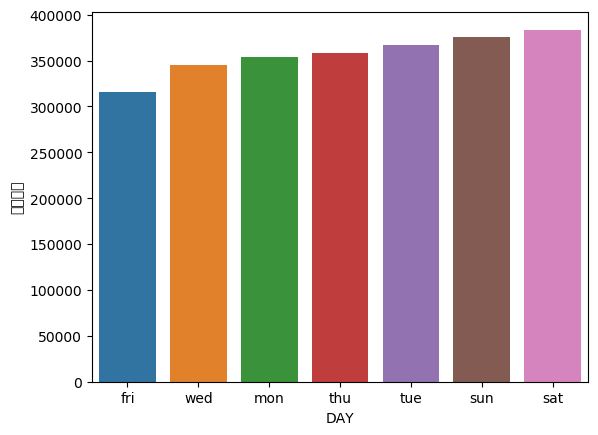

<Figure size 1000x1000 with 0 Axes>

In [33]:
sns.barplot(data=group_day, x='DAY',y='판매수량', order=group_day.sort_values('판매수량').DAY)
plt.xticks(size=10)
plt.figure(figsize=(10,10))

2) 월별 상품군 별 판매량

In [23]:
plt.rcdefaults()

In [24]:
group_month = data.loc[:, ['판매수량','MONTH', '상품군']].groupby(['MONTH','상품군']).sum()
group_month.reset_index(inplace=True)

In [25]:
train_month = train.loc[:, ['판매수량','MONTH','상품군']].groupby(['MONTH','상품군']).sum()
train_month.reset_index(level=1, inplace=True)
train_month_sorting = train_month.sort_values(['MONTH','판매수량'], ascending=False).groupby('MONTH').head(12)
train_month_sorting.reset_index(inplace=True)

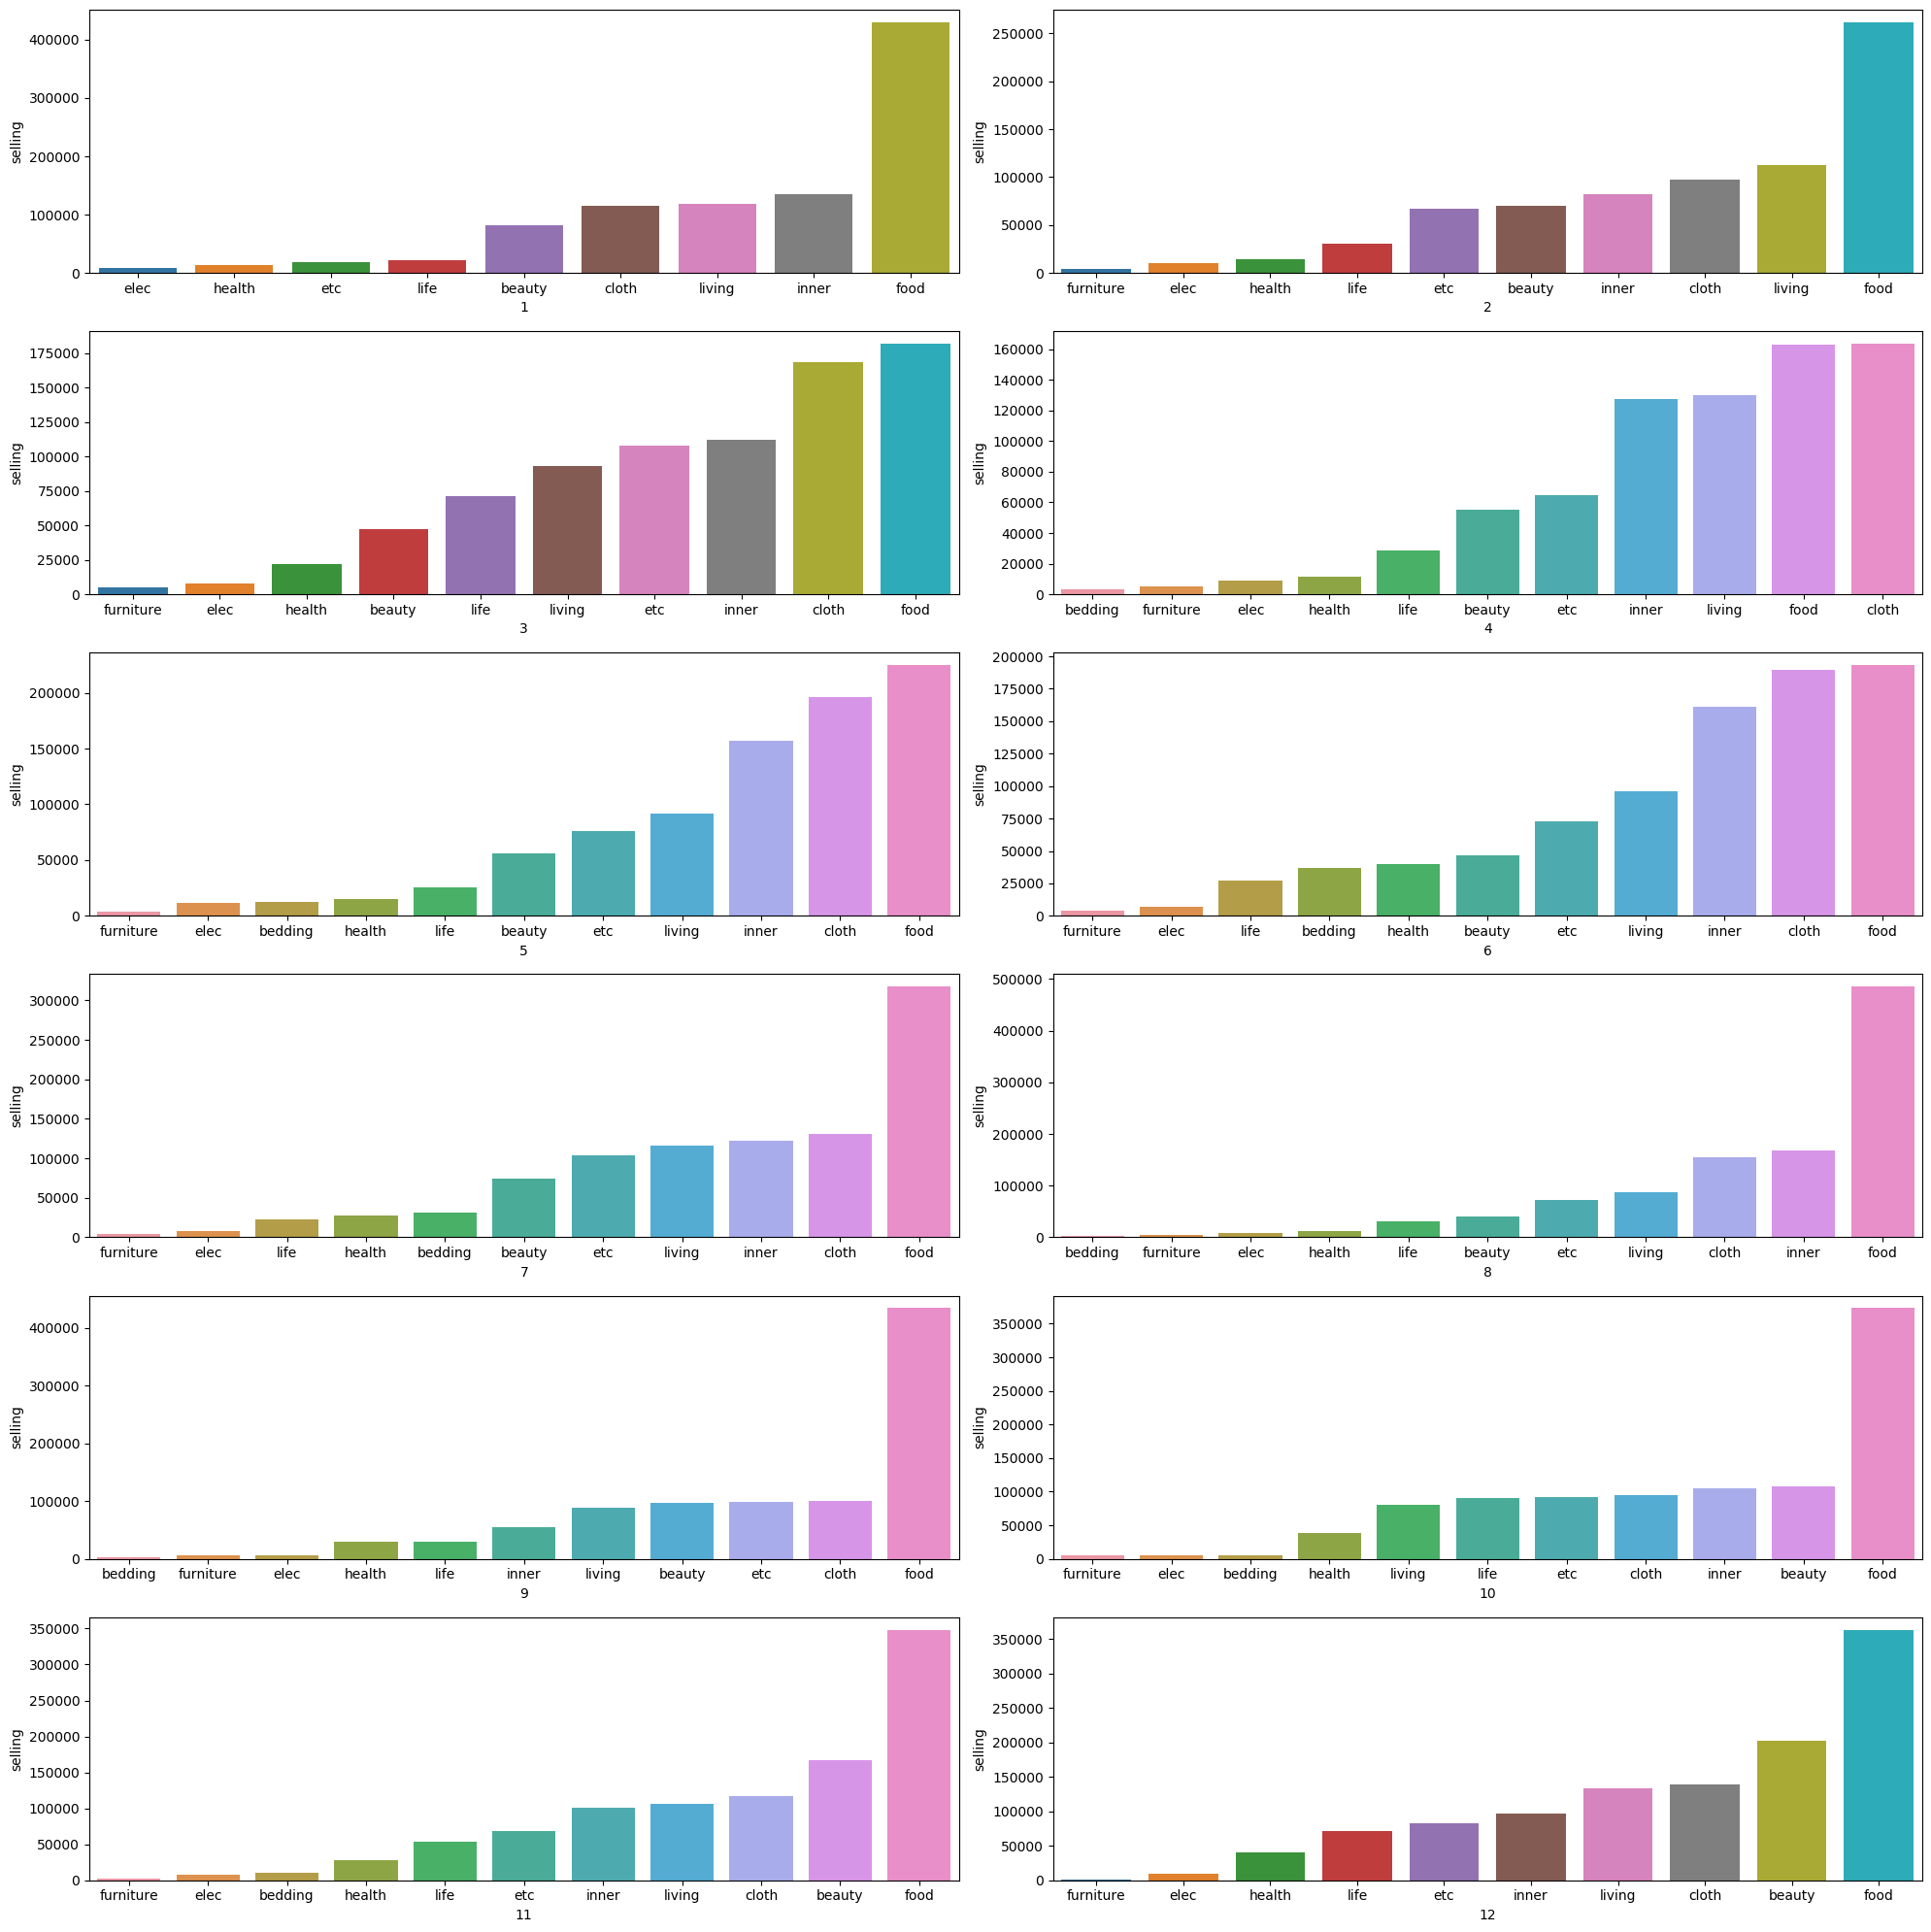

In [26]:
fig, ax = plt.subplots(6, 2, figsize=(20,20))
for r in range(6):
    for c in range(2):
        sns.barplot(data=group_month[group_month['MONTH']==2*r+c+1], x='상품군', y='판매수량', 
                    order=group_month[group_month['MONTH']==2*r+c+1].sort_values('판매수량').상품군, ax=ax[r][c])
        #ax[r][c].tick_params('x', labelsize=40)
        #ax[r][c].tick_params('y', labelsize=40)
        ax[r][c].set_ylabel('selling')
        ax[r][c].set_xlabel(2*r+c+1)
        fig.tight_layout()

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

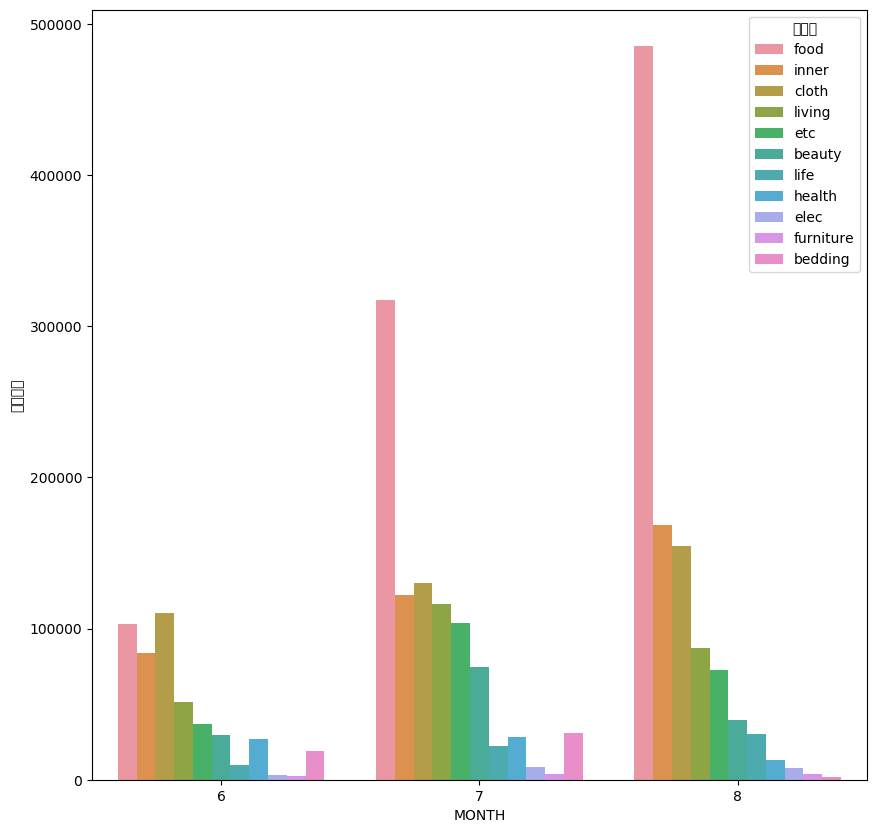

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(data=train_month_sorting, x='MONTH', y='판매수량', hue='상품군')

3) 계절별 판매량

In [30]:
group_season = data.loc[:, ['판매수량','SEASON']].groupby(['SEASON']).sum()
group_season.reset_index(level=0, inplace=True)

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

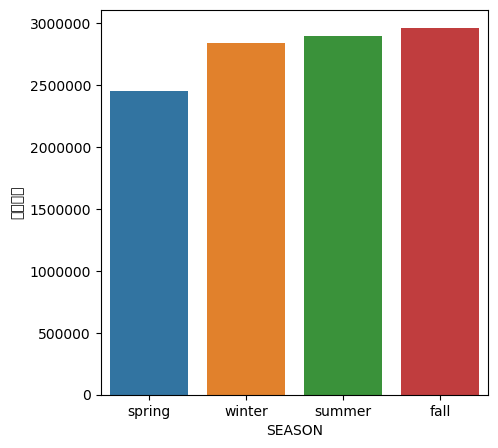

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(data=group_season, x='SEASON',y='판매수량',\
            order=group_season.sort_values('판매수량').SEASON)

4) 마더코드별 판매량

In [103]:
group_code = train.loc[:, ['마더코드','판매수량','노출(분)','취급액']].groupby(['마더코드']).sum()
group_code_mean = train.loc[:, ['마더코드','판매수량']].groupby(['마더코드']).mean()
#group_code.sort_values('판매수량', ascending=False)
#group_code_mean.sort_values('판매수량',ascending=False)

5) 마더코드 노출 시간 대비 판매량/판매액 -> topitem

In [35]:
test = pd.read_excel('./test.xlsx', header=1)

In [104]:
# 마더코드 분당 기준 소팅 
group_code['판매수량/노출'] = group_code['판매수량']/group_code['노출(분)']
group_code.sort_values('판매수량/노출', ascending=False)

판매수량   노출(분)          취급액    판매수량/노출
마더코드                                                
100492   5733.547094    60.0  286104000.0  95.559118
100499  10532.731830   120.0  420256000.0  87.772765
100046   5242.750809    60.0  162001000.0  87.379180
100754   4690.802005    60.0  187163000.0  78.180033
100323   9063.927856   120.0  452290000.0  75.532732
...              ...     ...          ...        ...
100152     19.462977   120.0   23659000.0   0.162191
100153     14.935671   120.0    4736000.0   0.124464
100149    420.987143  3840.0  931476000.0   0.109632
100788    250.068999  2915.5  581318000.0   0.085772
100573     40.660286   960.0  105219000.0   0.042354

[272 rows x 4 columns]

In [107]:
group_code['취급액/노출'] = group_code['취급액']/group_code['노출(분)']
group_code.sort_values('취급액/노출', ascending=False)

판매수량   노출(분)          취급액    판매수량/노출        취급액/노출
마더코드                                                              
100492   5733.547094    60.0  286104000.0  95.559118  4.768400e+06
100323   9063.927856   120.0  452290000.0  75.532732  3.769083e+06
100499  10532.731830   120.0  420256000.0  87.772765  3.502133e+06
100754   4690.802005    60.0  187163000.0  78.180033  3.119383e+06
100172   3066.732348    60.0  186764000.0  51.112206  3.112733e+06
...              ...     ...          ...        ...           ...
100346    368.203390   106.0   21724000.0   3.473617  2.049434e+05
100788    250.068999  2915.5  581318000.0   0.085772  1.993888e+05
100152     19.462977   120.0   23659000.0   0.162191  1.971583e+05
100573     40.660286   960.0  105219000.0   0.042354  1.096031e+05
100153     14.935671   120.0    4736000.0   0.124464  3.946667e+04

[272 rows x 5 columns]

In [113]:
numtop = list(group_code.sort_values('판매수량/노출', ascending=False).index[:50])
pricetop = list(group_code.sort_values('취급액/노출', ascending=False).index[:50])

In [123]:
topcode = list(set(numtop).intersection(set(pricetop)))

- topcode 판매 시간대/요일

In [145]:
topitem = train[train['마더코드'].isin(topcode)]

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

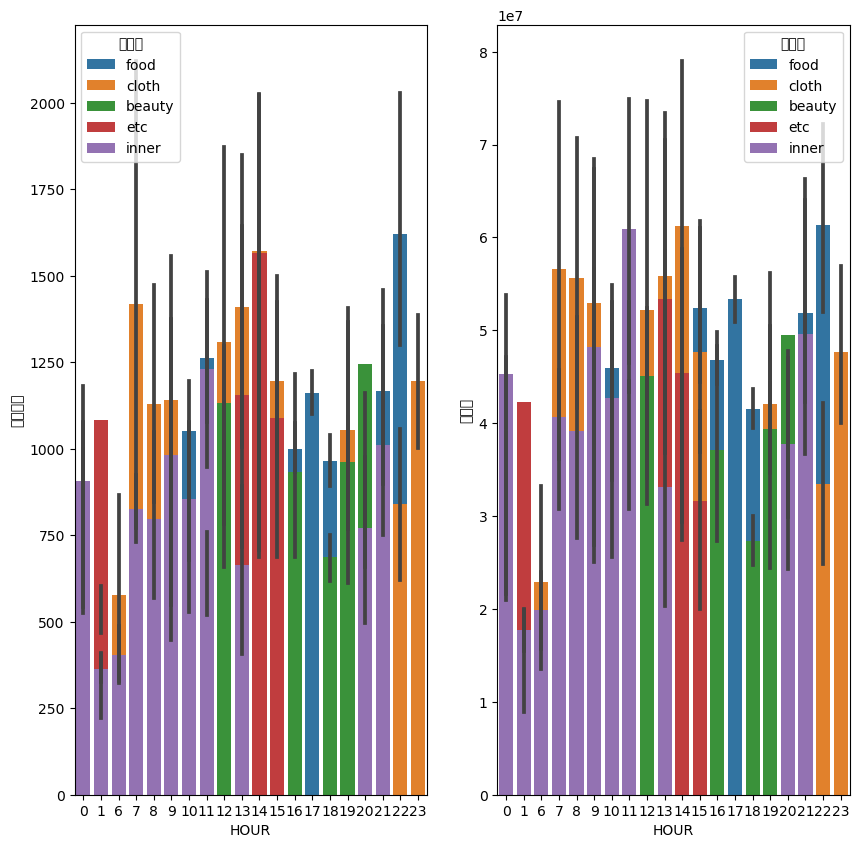

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))

sns.barplot(data=topitem, x='HOUR', y='판매수량', hue='상품군', dodge=False, ax=axs[0])
sns.barplot(data=topitem, x='HOUR', y='취급액', hue='상품군', dodge=False, ax=axs[1])

- 요일별/시간대별 topitem 정리 

In [146]:
topitem_day = topitem.loc[:, ['DAY','판매수량','HOUR','취급액','상품군']].groupby(['DAY','HOUR','상품군']).sum()
topitem_day.reset_index(inplace=True)

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44400 missing from current font.

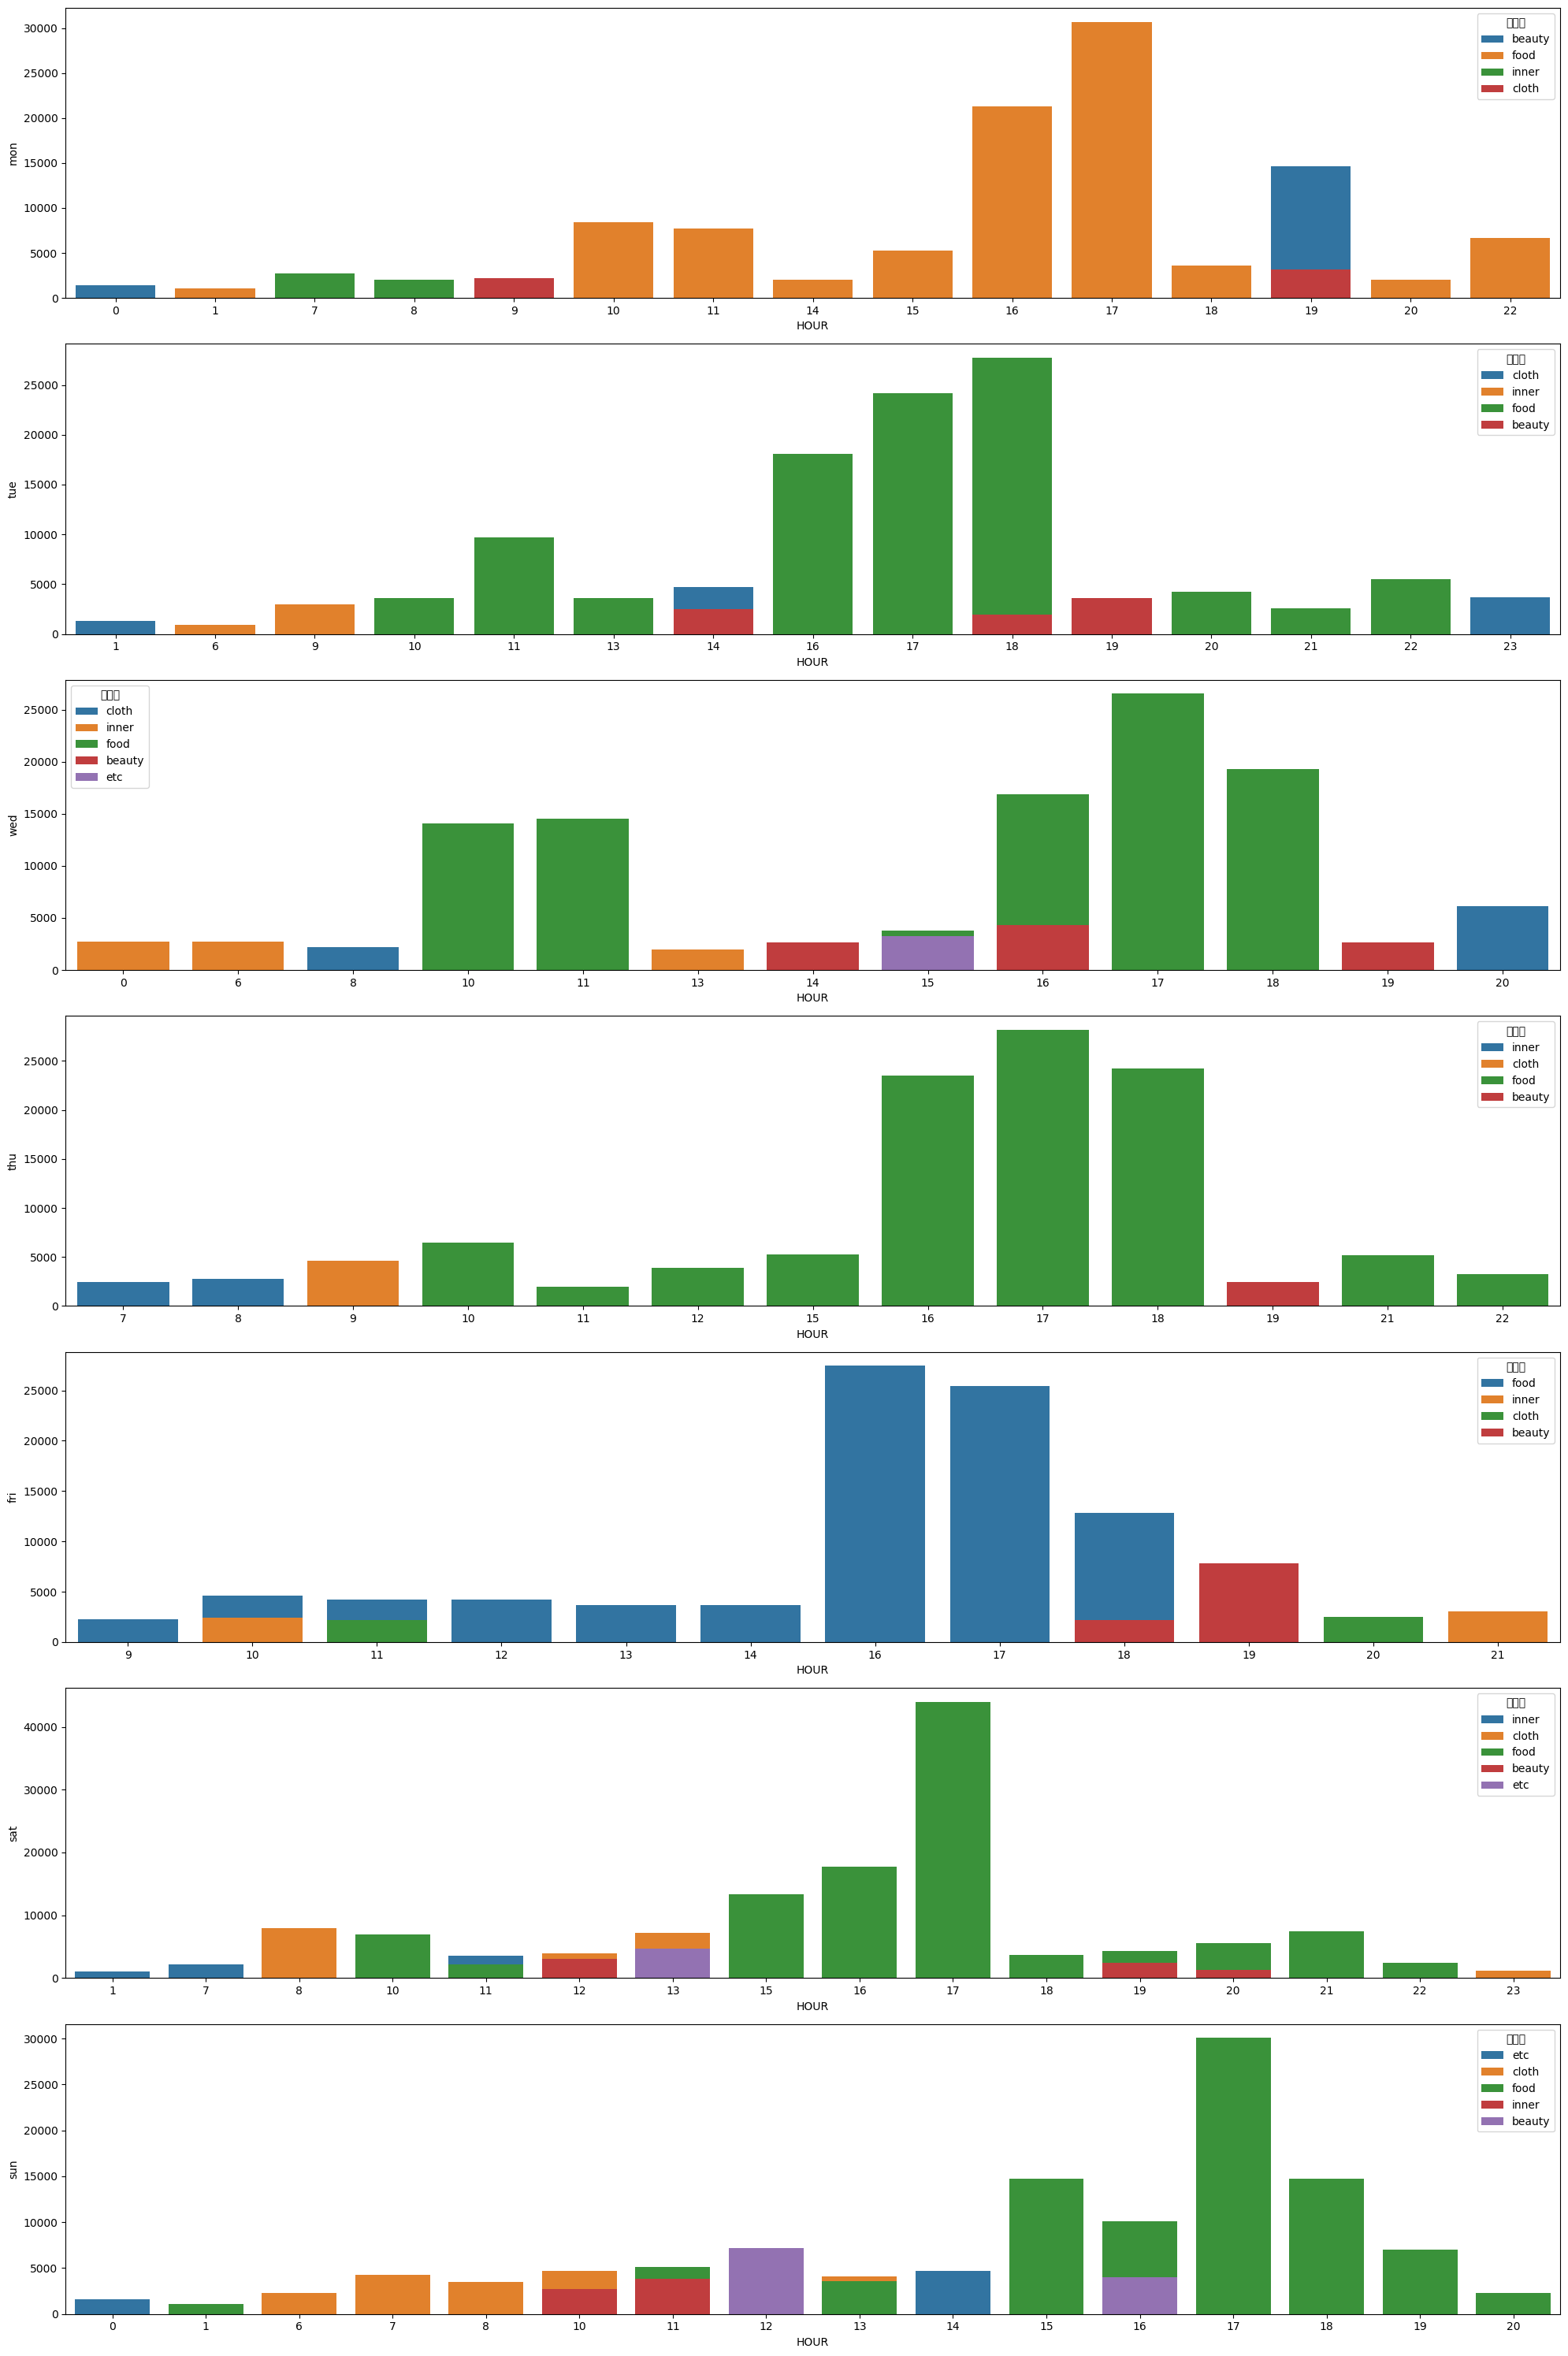

In [149]:
fig, ax = plt.subplots(7,1, figsize=(20,30))
j=0
for i in yo:
    sns.barplot(data=topitem_day[topitem_day['DAY']==i], x='HOUR', y='판매수량', hue='상품군', dodge=False, ax=ax[j])
    ax[j].set_ylabel(i)
    fig.tight_layout()
    j+=1

In [112]:
#meantop = list(group_code_mean.sort_values('판매수량', ascending=False).index[:20])
#sumtop = list(group_code.sort_values('판매수량', ascending=False)[:20].index)

6) 계절별/마더코드별 판매량

In [38]:
spring = data[data['SEASON']=='spring'].loc[:, ['마더코드','판매수량', '상품군']].groupby(['마더코드']).sum()
summer = data[data['SEASON']=='summer'].loc[:, ['마더코드','판매수량','상품군']].groupby(['마더코드']).sum()
fall = data[data['SEASON']=='fall'].loc[:, ['마더코드','판매수량','상품군']].groupby(['마더코드']).sum()
winter = data[data['SEASON']=='winter'].loc[:, ['마더코드','판매수량','상품군']].groupby(['마더코드']).sum()

In [39]:
spring_top = spring.sort_values('판매수량',ascending=False)[:100]
summer_top = summer.sort_values('판매수량',ascending=False)[:100]
fall_top = fall.sort_values('판매수량',ascending=False)[:100]
winter_top = winter.sort_values('판매수량',ascending=False)[:100]

7) 시간별 판매량

- 상품군별 

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

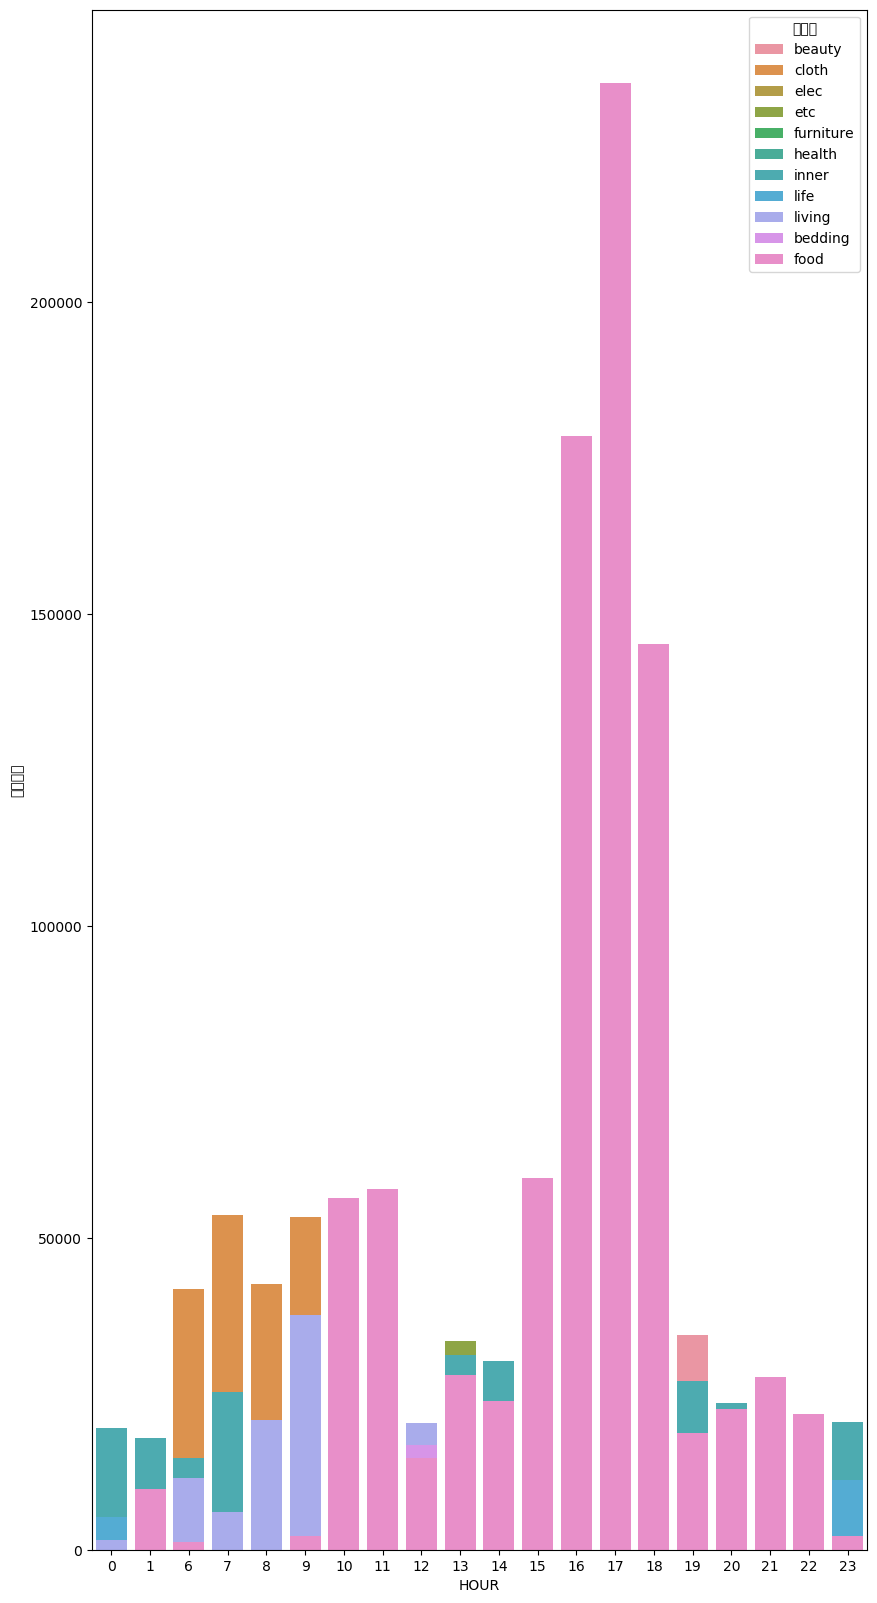

In [90]:
train_hour = train.loc[:, ['판매수량','HOUR','상품군']].groupby(['HOUR','상품군']).sum()
train_hour.reset_index(inplace=True)

plt.figure(figsize=(10,20))
sns.barplot(data=train_hour, x='HOUR', y='판매수량', hue='상품군', dodge=False)

- 요일별

In [51]:
group_day_hour = train.loc[:, ['HOUR','판매수량','DAY']].groupby(['DAY','HOUR']).sum()
group_day_hour.reset_index(inplace=True)

In [68]:
yo = ['mon', 'tue', 'wed','thu','fri','sat','sun']

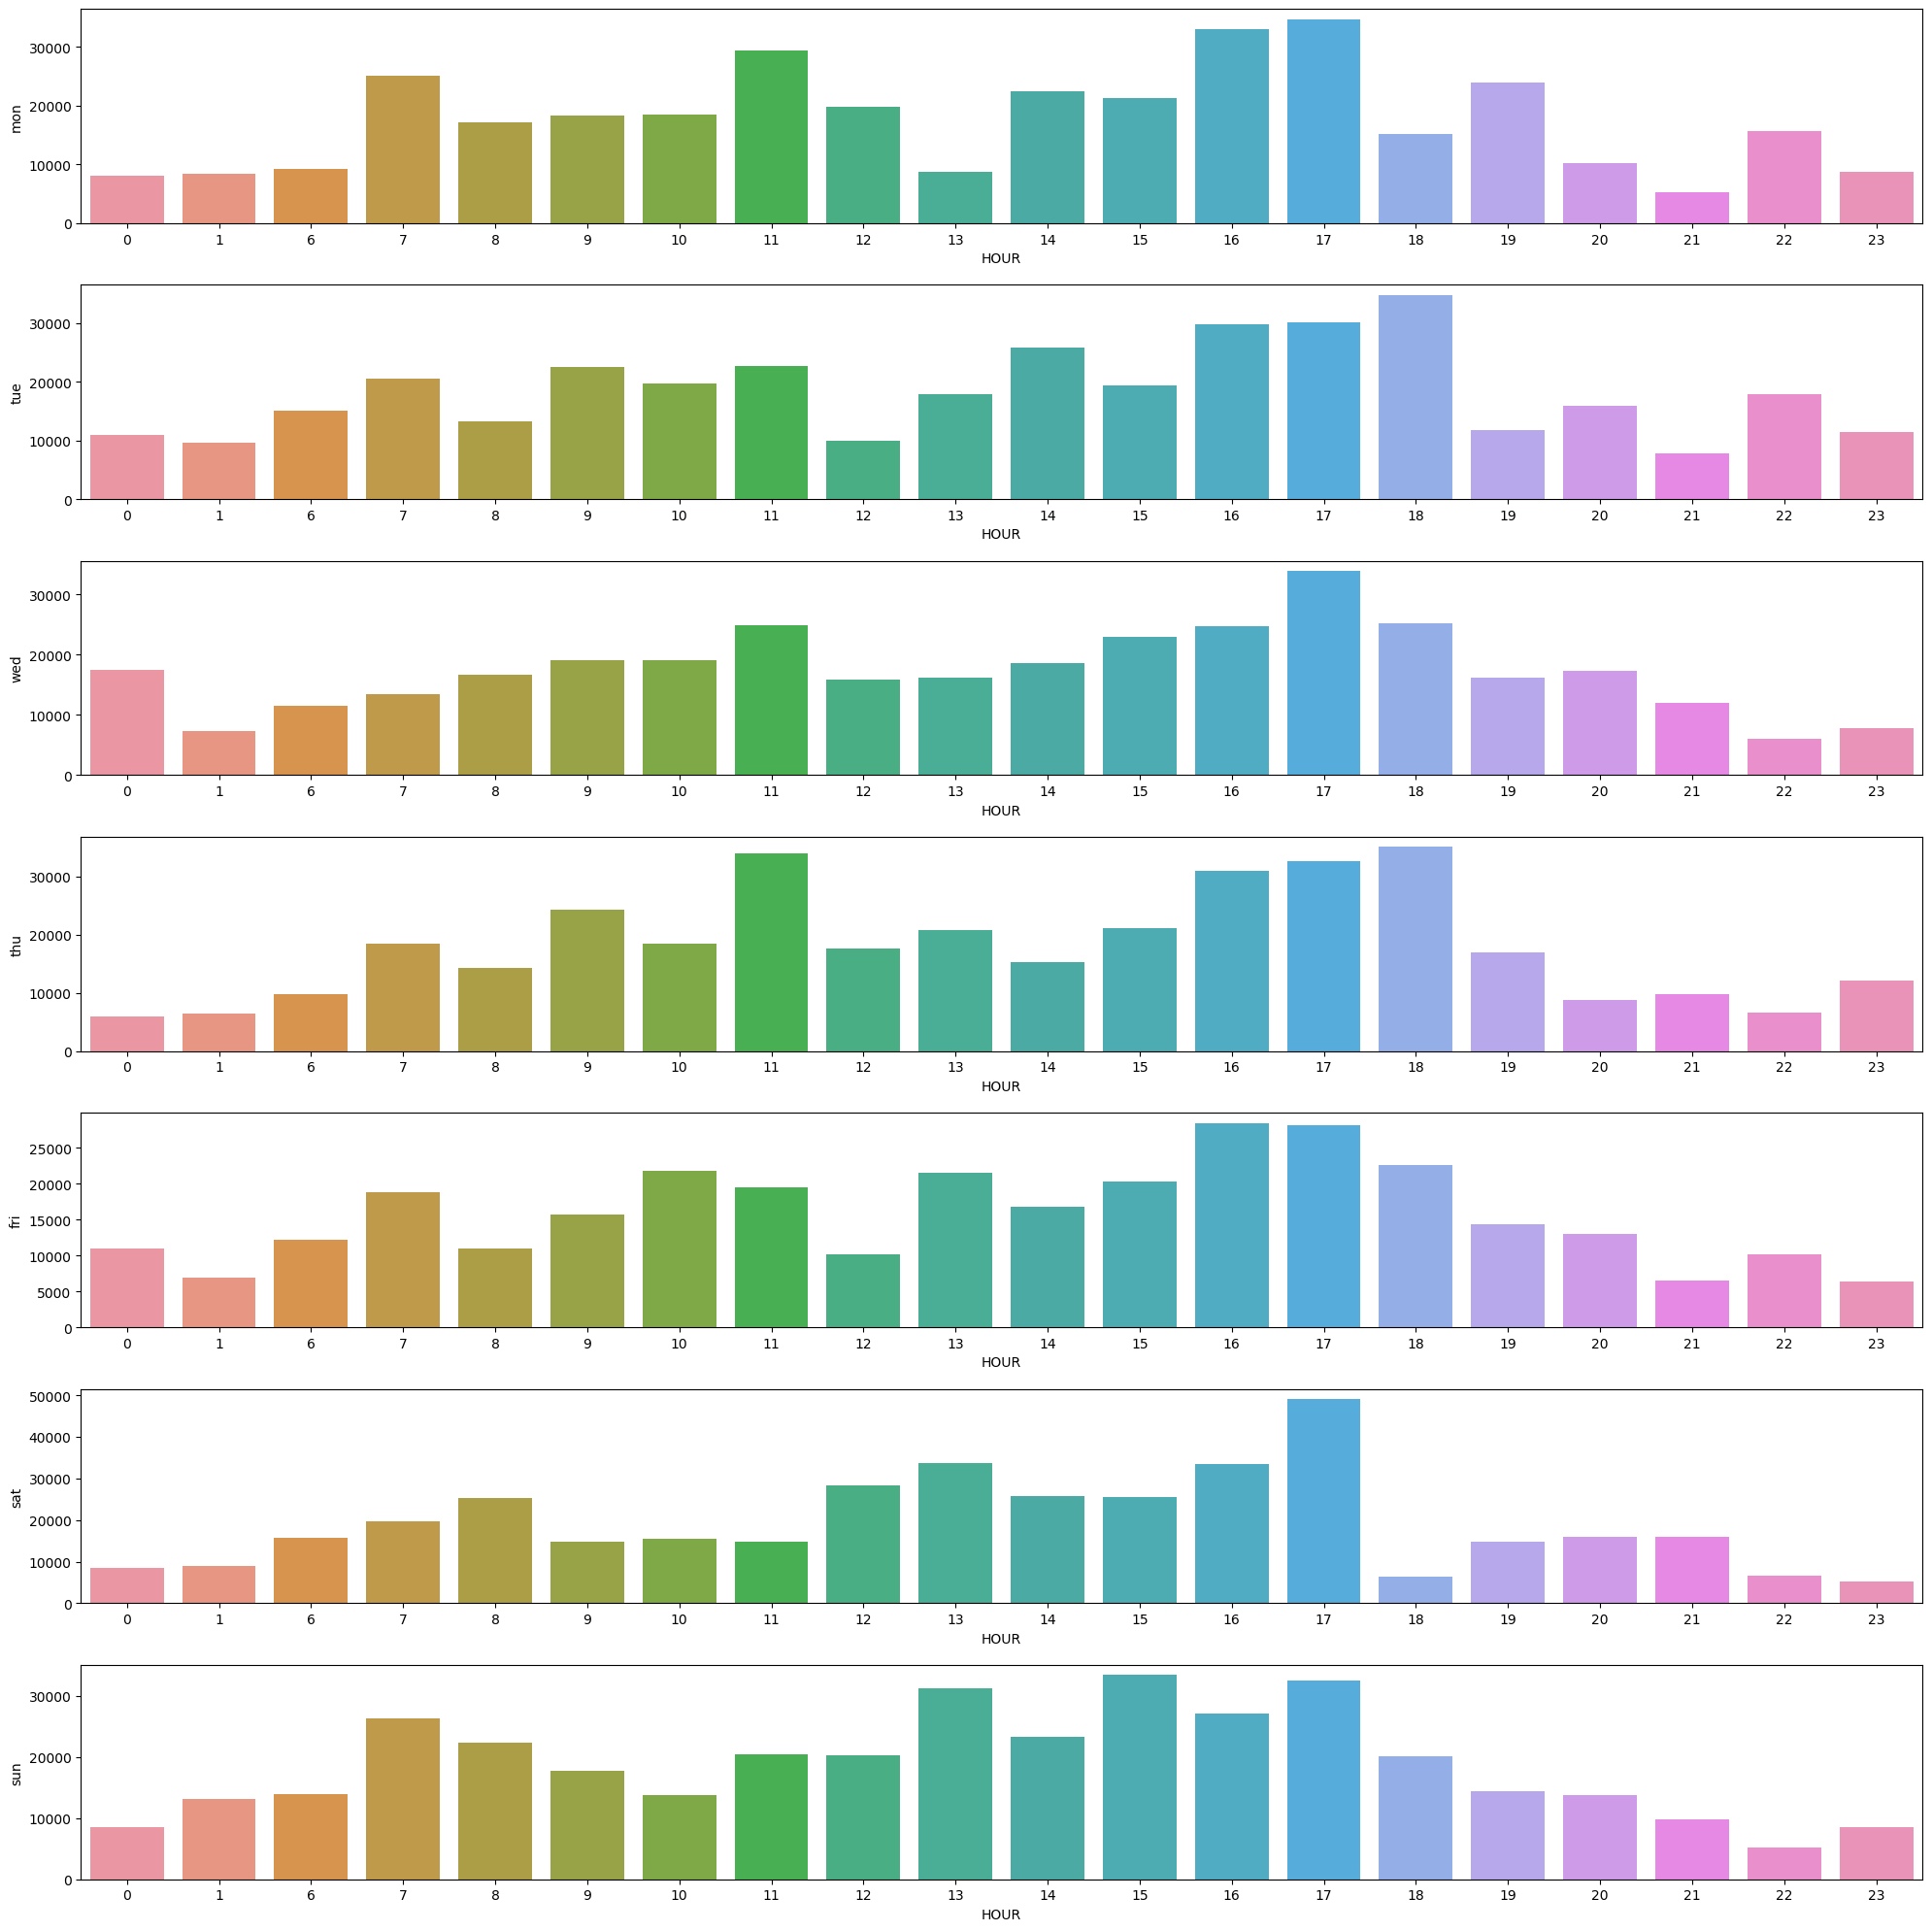

In [72]:
fig, ax = plt.subplots(7,1, figsize=(20,20))
j=0
for i in yo:
    sns.barplot(data=group_day_hour[group_day_hour['DAY']==i], x='HOUR', y='판매수량', ax=ax[j])
    ax[j].set_ylabel(i)
    fig.tight_layout()
    j+=1

In [150]:
test.head()

방송일시  노출(분)    마더코드    상품코드                   상품명 상품군   판매단가  \
0 2020-06-01 06:20:00   20.0  100650  201971       잭필드 남성  반팔셔츠 4종  의류  59800   
1 2020-06-01 06:40:00   20.0  100650  201971       잭필드 남성  반팔셔츠 4종  의류  59800   
2 2020-06-01 07:00:00   20.0  100650  201971       잭필드 남성  반팔셔츠 4종  의류  59800   
3 2020-06-01 07:20:00   20.0  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷  69900   
4 2020-06-01 07:40:00   20.0  100445  202278  쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티  속옷  69900   

   취급액  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
 

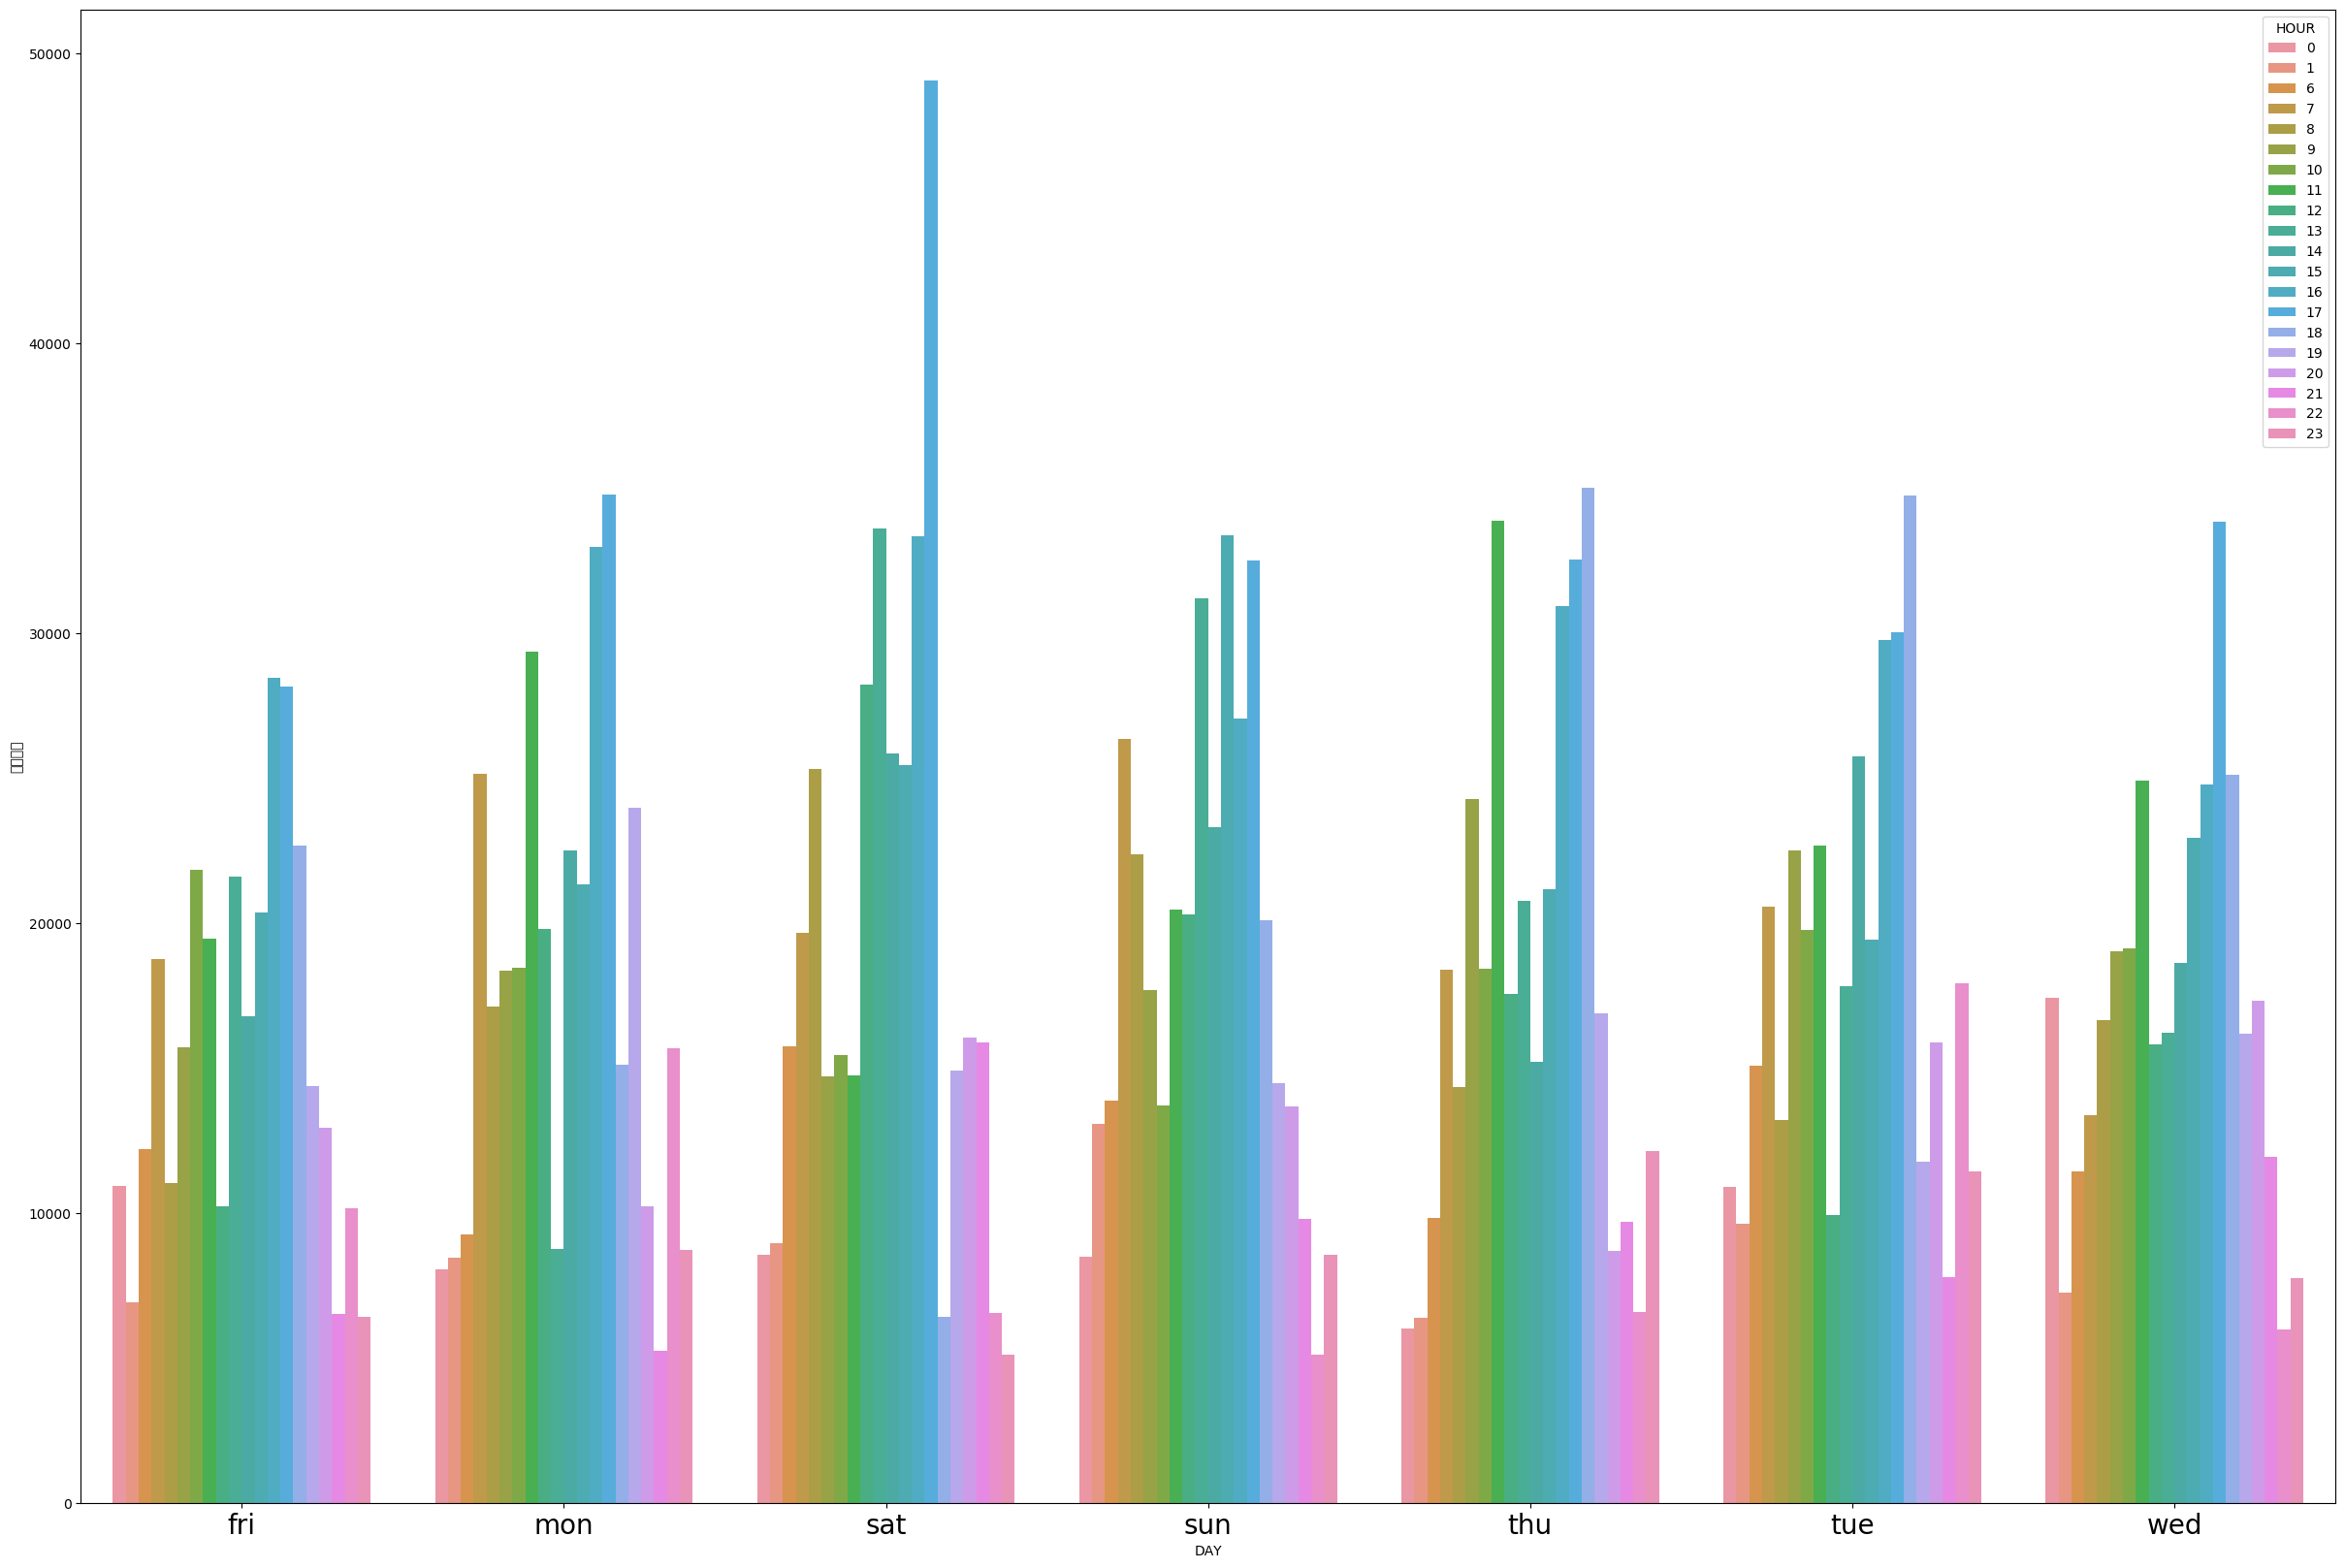

In [99]:
group_day = train.loc[:, ['판매수량','HOUR','DAY']].groupby(['DAY','HOUR']).sum()
group_day.reset_index(inplace=True)
#train_DAY

plt.figure(figsize=(30,20))
sns.barplot(data=group_day, x='DAY', y='판매수량', hue='HOUR')
plt.xticks(size=20)

- 시간대별 <판매수익> ; 판매량이랑 판매수익 높은 지점이 다름(21-23시 고가 많음) 

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50529 missing from current font.
  f

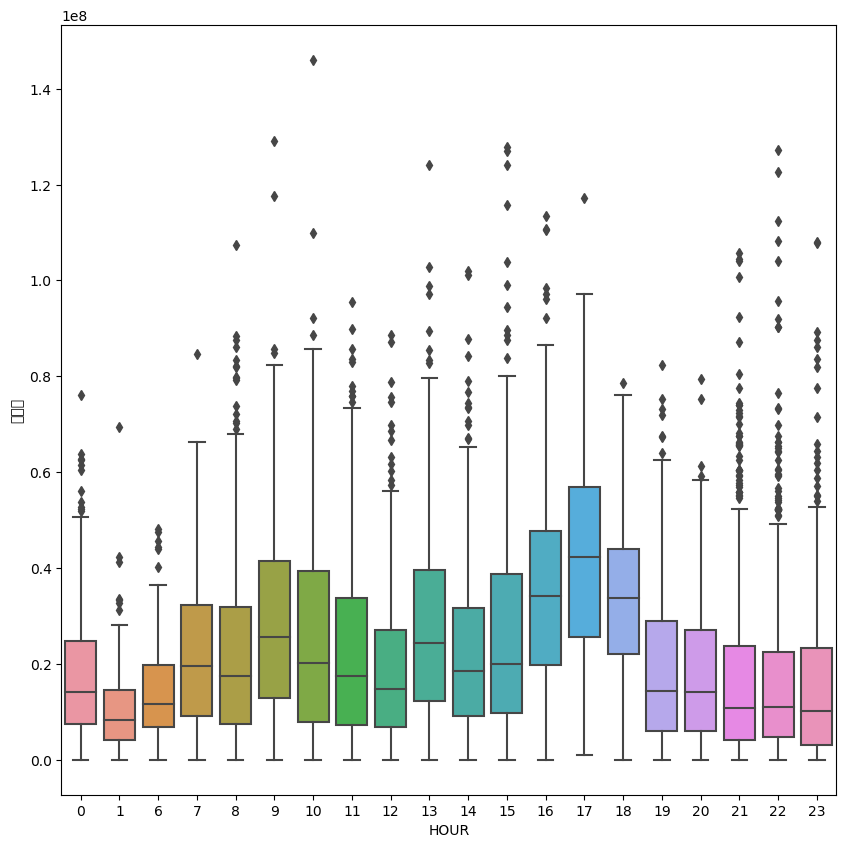

In [100]:
group_hour_price = train.loc[:,['HOUR','취급액','상품군']]
group_hour_price.reset_index(inplace=True)
plt.figure(figsize=(10,10))
sns.boxplot(data=group_hour_price, x='HOUR', y='취급액')

10) 상품군별 마더코드 판매량 -> 판매량 높은 마더코드에 가중

In [74]:
group_item = train.loc[:, ['마더코드','상품군','판매수량']].groupby(['상품군','마더코드']).sum()
group_item.reset_index(inplace=True)

In [370]:
#grouped_item = data.loc[:, ['마더코드','상품군','판매수량']].groupby(['상품군','마더코드']).sum()
#grouped_item.reset_index(inplace=True)

In [75]:
x = list(set(group_item['상품군']))

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45908 missing from current font.
 

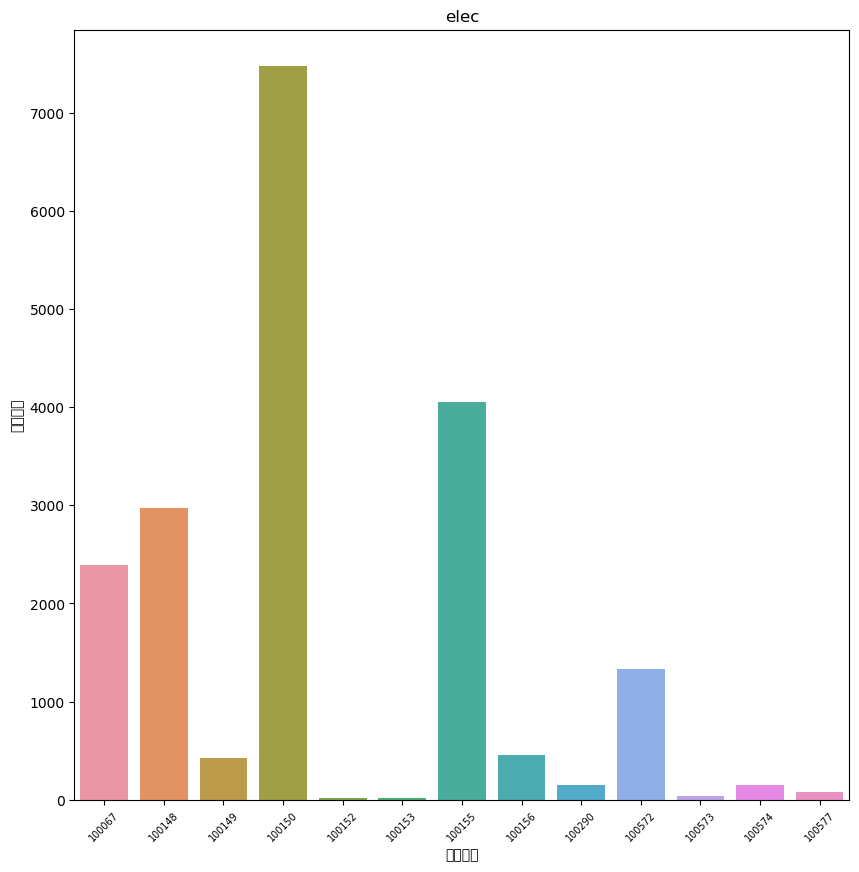

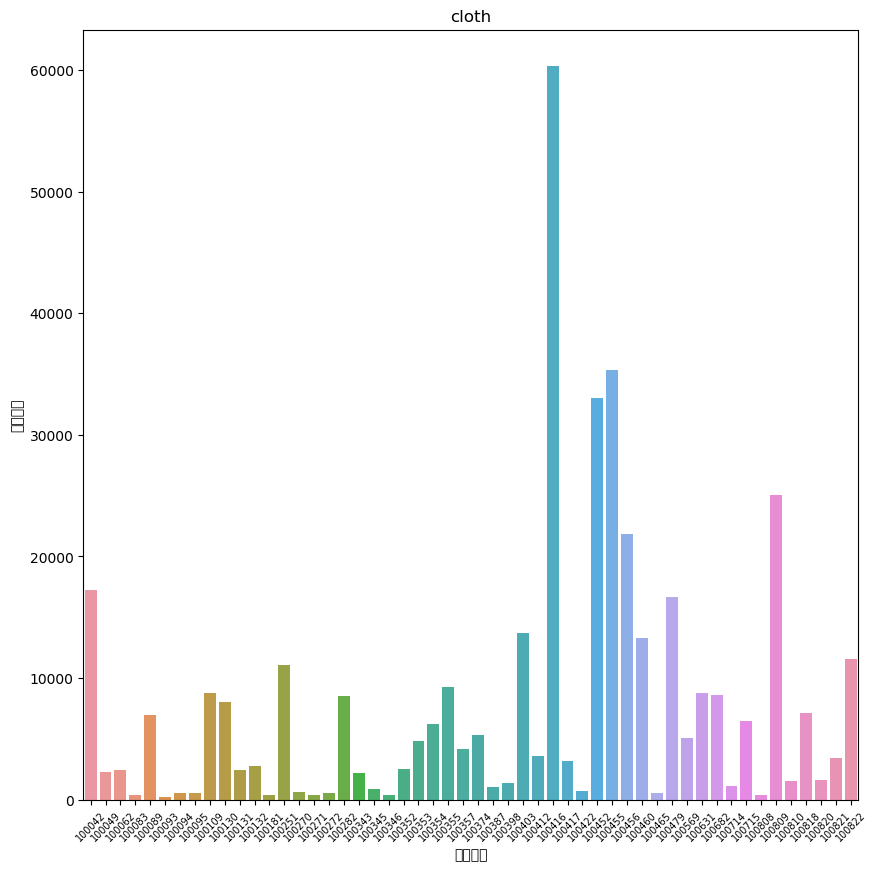

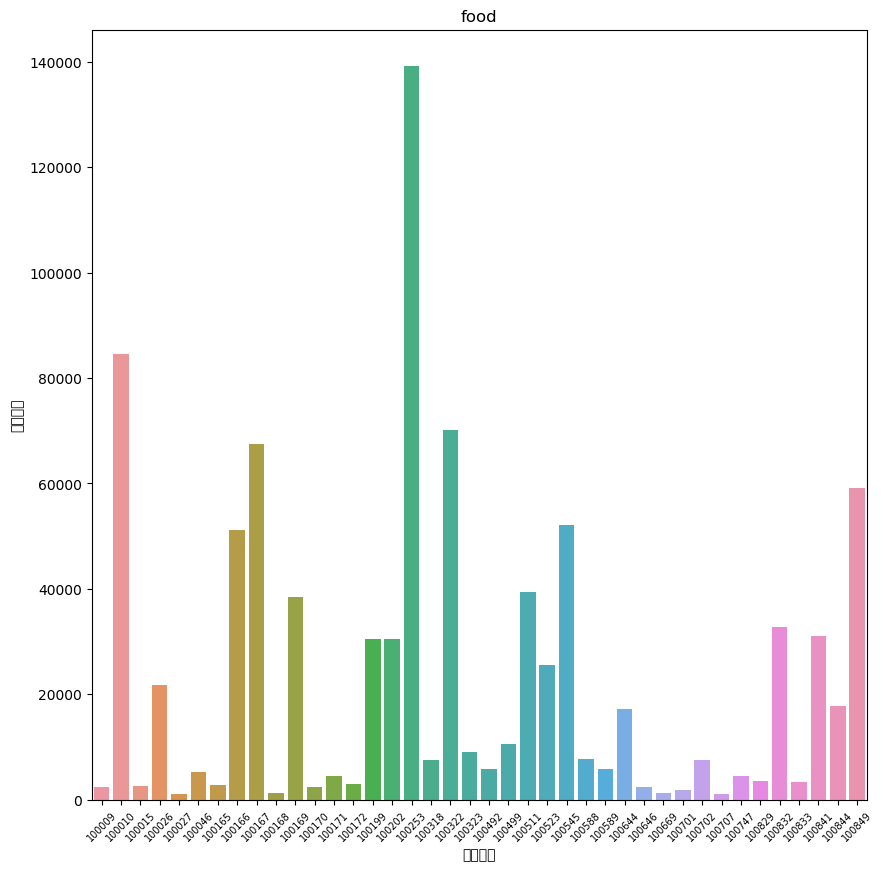

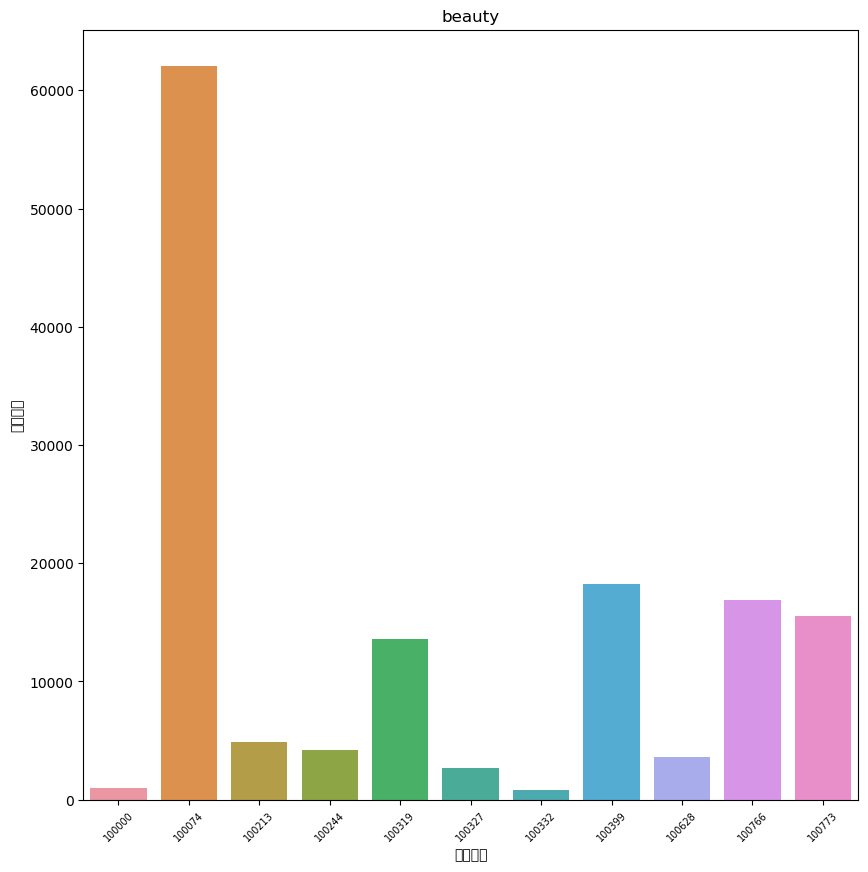

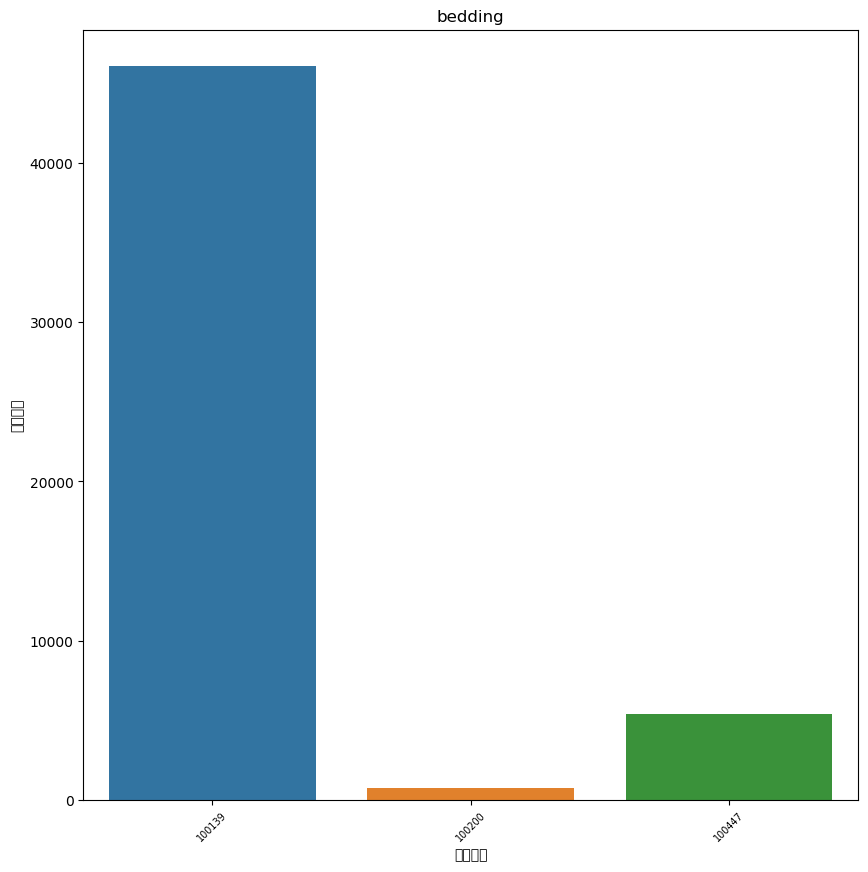

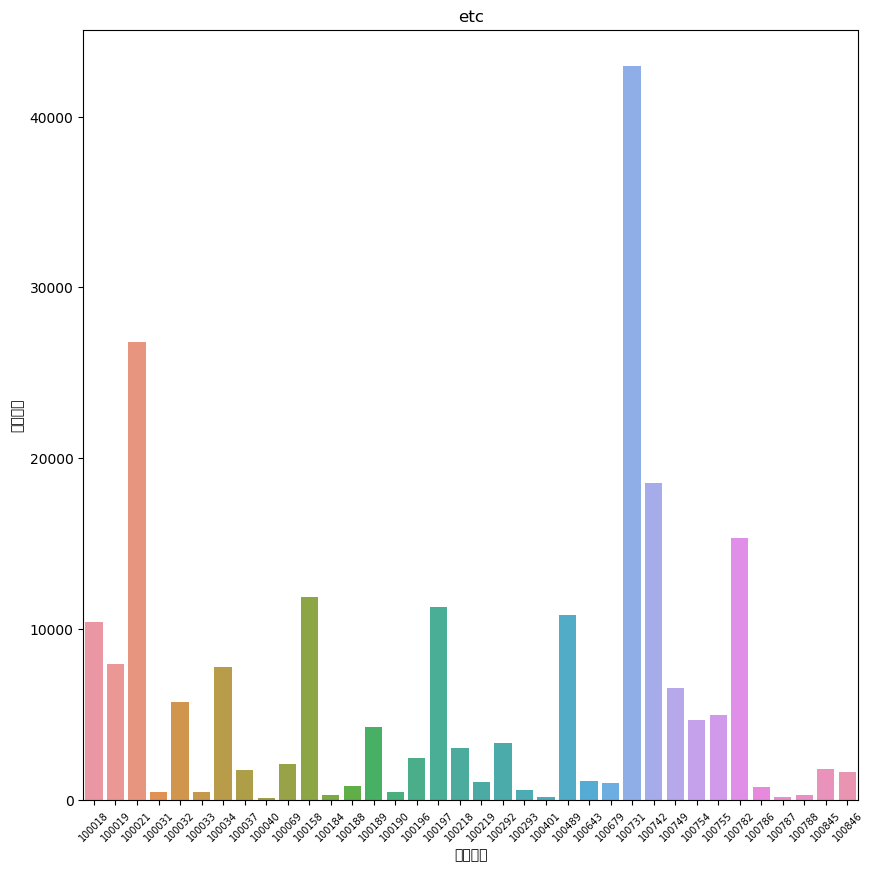

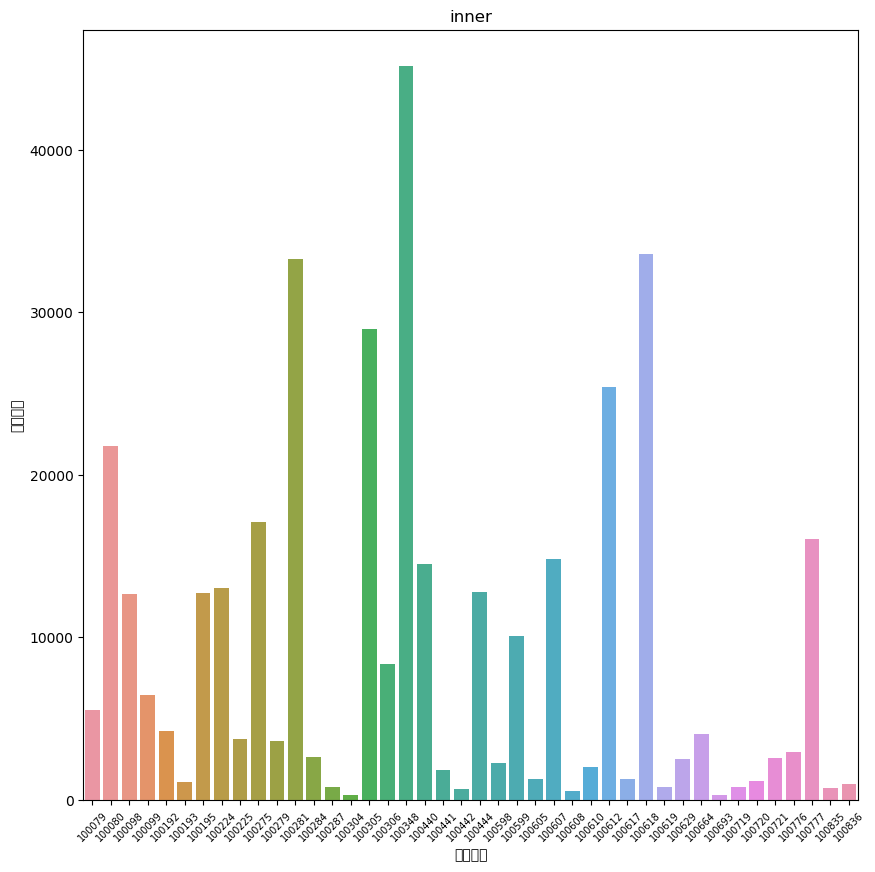

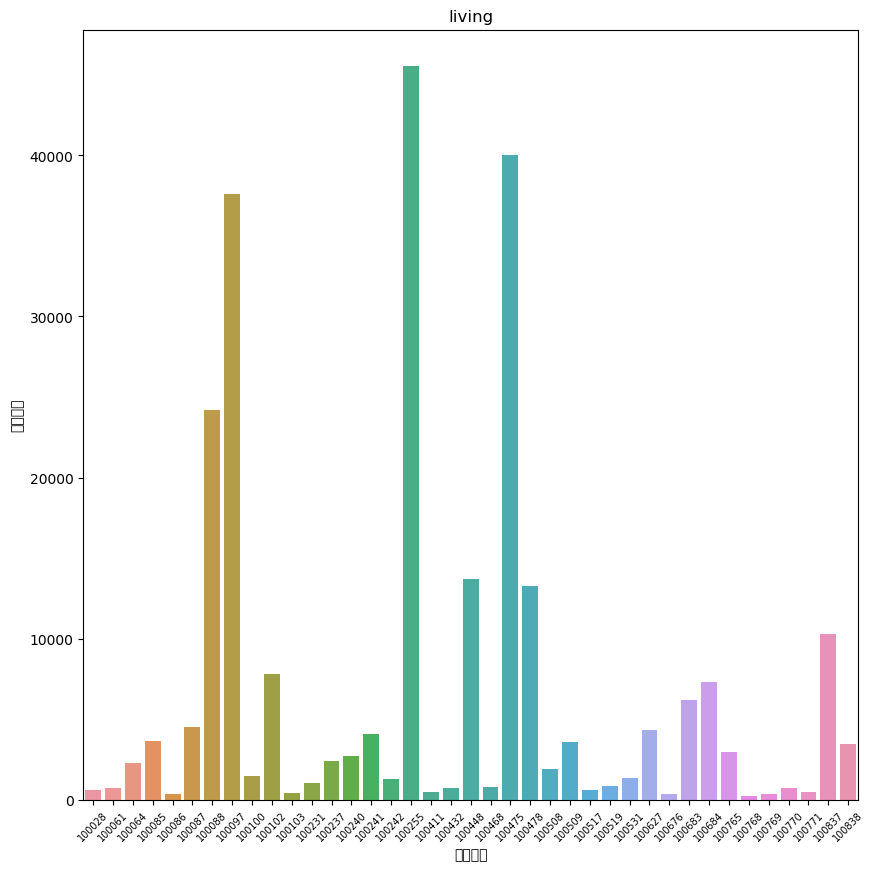

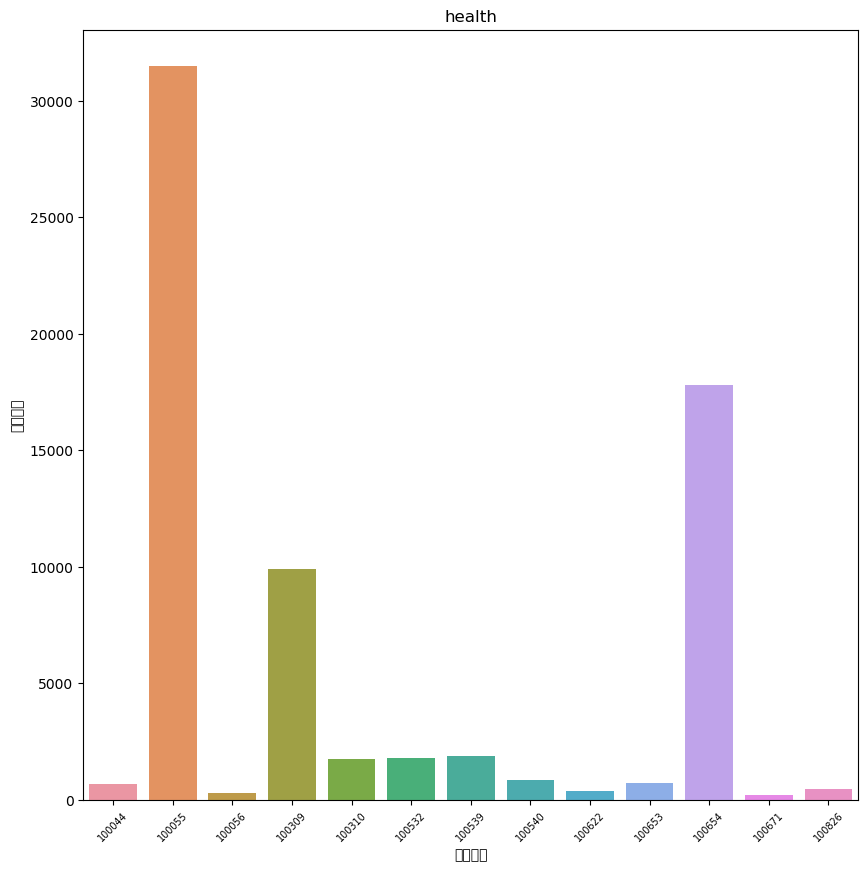

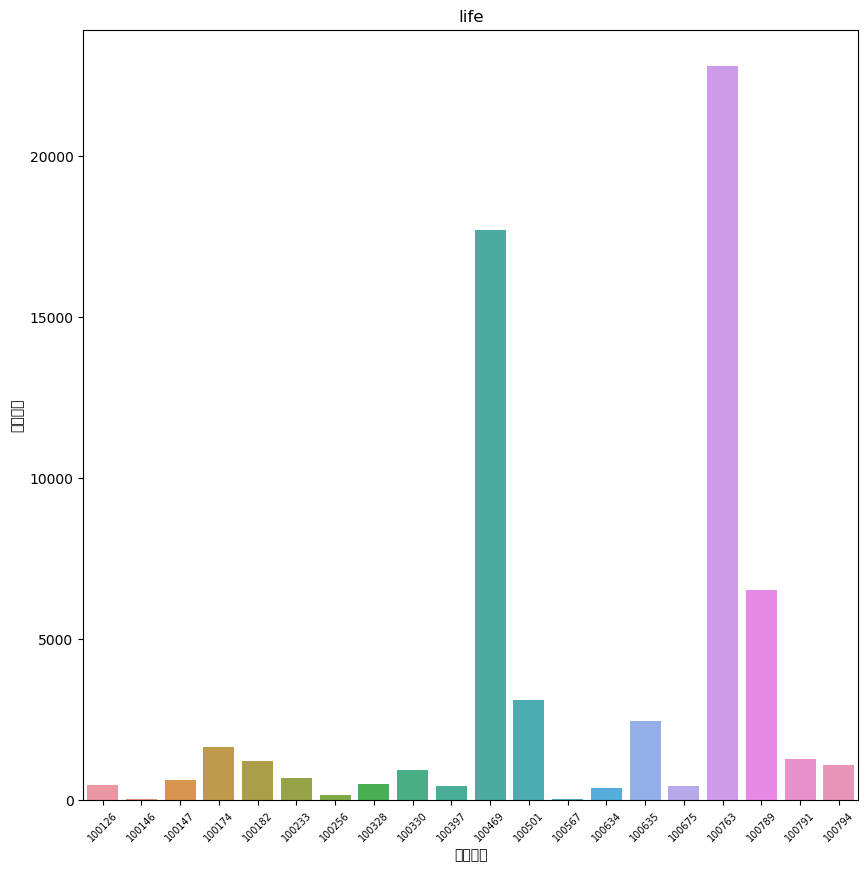

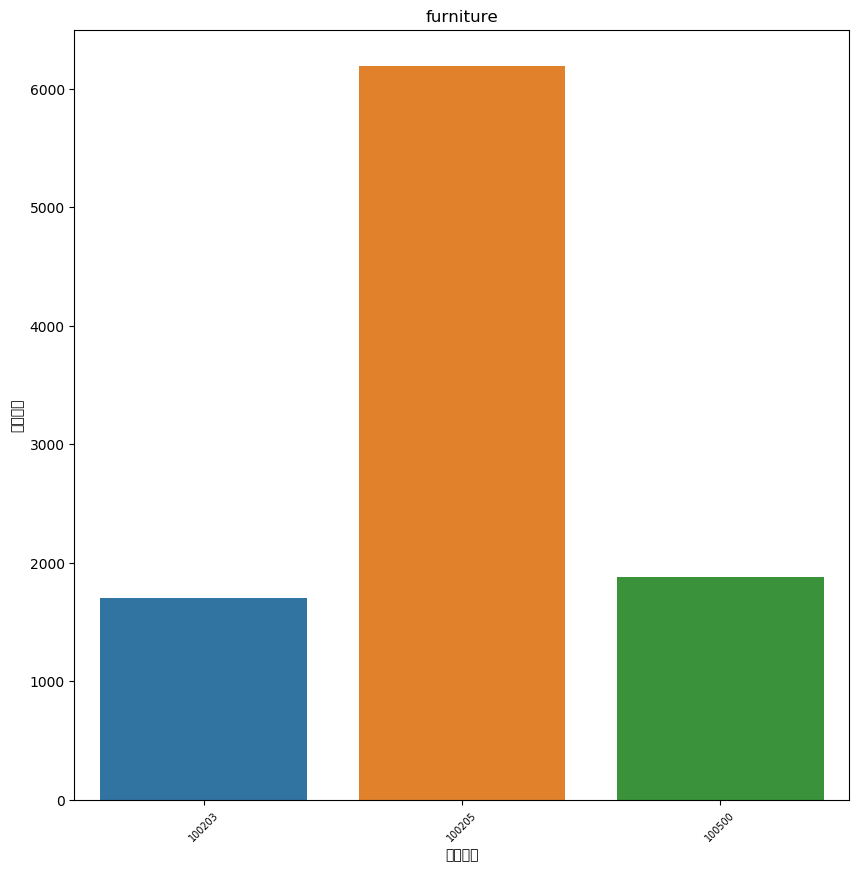

In [85]:
for item in x:
    plt.figure(figsize=(10,10))
    sns.barplot(data=group_item[group_item['상품군']==item], x='마더코드', y='판매수량')
    plt.title(item)
    plt.xticks(rotation=45, size=7)

11) 상품군/판매단가 -> 판매단가가 판매 수량에 영향 미치는지 볼 것 
- 마더코드별로 판매단가 매번 다름

In [86]:
group_price = train.loc[:, ['판매단가','상품군']].groupby(['상품군'])

In [87]:
group_price.describe()

판매단가                                                              \
            count          mean            std       min       25%        50%   
상품군                                                                             
beauty      216.0  4.900185e+04   11950.739835   39800.0   39800.0    39900.0   
bedding     282.0  7.136383e+04   23168.062373   49900.0   59900.0    69900.0   
cloth       824.0  2.975059e+05  639191.128830   29000.0   39900.0    49900.0   
elec       1350.0  1.653093e+06  835532.255463  164000.0  894000.0  1669000.0   
etc        1090.0  6.287778e+05  847328.330101   29000.0   58000.0   178000.0   
food        955.0  4.677581e+04   10937.209355   29900.0   38900.0    49900.0   
furniture   513.0  7.307953e+05  223953.187721  499000.0  598000.0   648000.0   
health      177.0  8.450254e+04   39165.436290   59000.0   59000.0    75050.0   
inner       880.0  7.744466e+04   31465.119733   29900.0   49900.0    69900.0   
life        459.0  2.137484e+05  306525.297069   12800.0   89000.0   128000.0   
living     1284.0  1.437140e+05   62590.881501   24900.0  109000.0   129000.0   

                                 
                 75%        max  
상품군                              
beauty       59000.0    79900.0  
bedding      79900.0   179000.0  
cloth        69900.0  2490000.0  
elec       2400000.0  3190000.0  
etc        1052500.0  3650000.0  
food         55900.0    99000.0  
furniture   899000.0  1249000.0  
health       79000.0   198000.0  
inner        89900.0   139000.0  
life        167000.0  1980000.0  
living      198000.0   289000.0

12) 주 단위?

13) word cloud : 방송시간 대비 매출액/양 많은 것 -> topitem으로 정리

# test / train item  distribution

- test data는 코로나 영향을 받는 시기, 이 때 변화를 보이는 상품군 파악

In [166]:
intercode = list(set(test['마더코드']).intersection(set(train['마더코드'])))
interitem = train[train['마더코드'].isin(intercode)]

In [163]:
#len(set(test['마더코드']).intersection(set(data['마더코드'])))

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44400 missing from current font.
  f

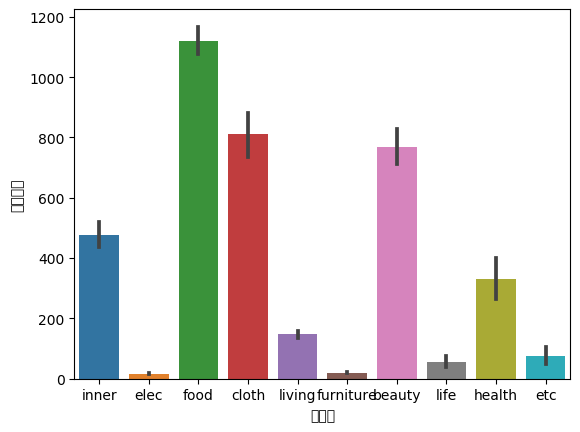

In [174]:
sns.barplot(data=interitem, x='상품군', y='판매수량')

In [183]:
interitem_code = interitem.loc[:, ['마더코드','판매수량','상품군']].groupby(['상품군','마더코드']).sum()
interitem_code.reset_index(inplace=True)

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45908 missing from current font.
 

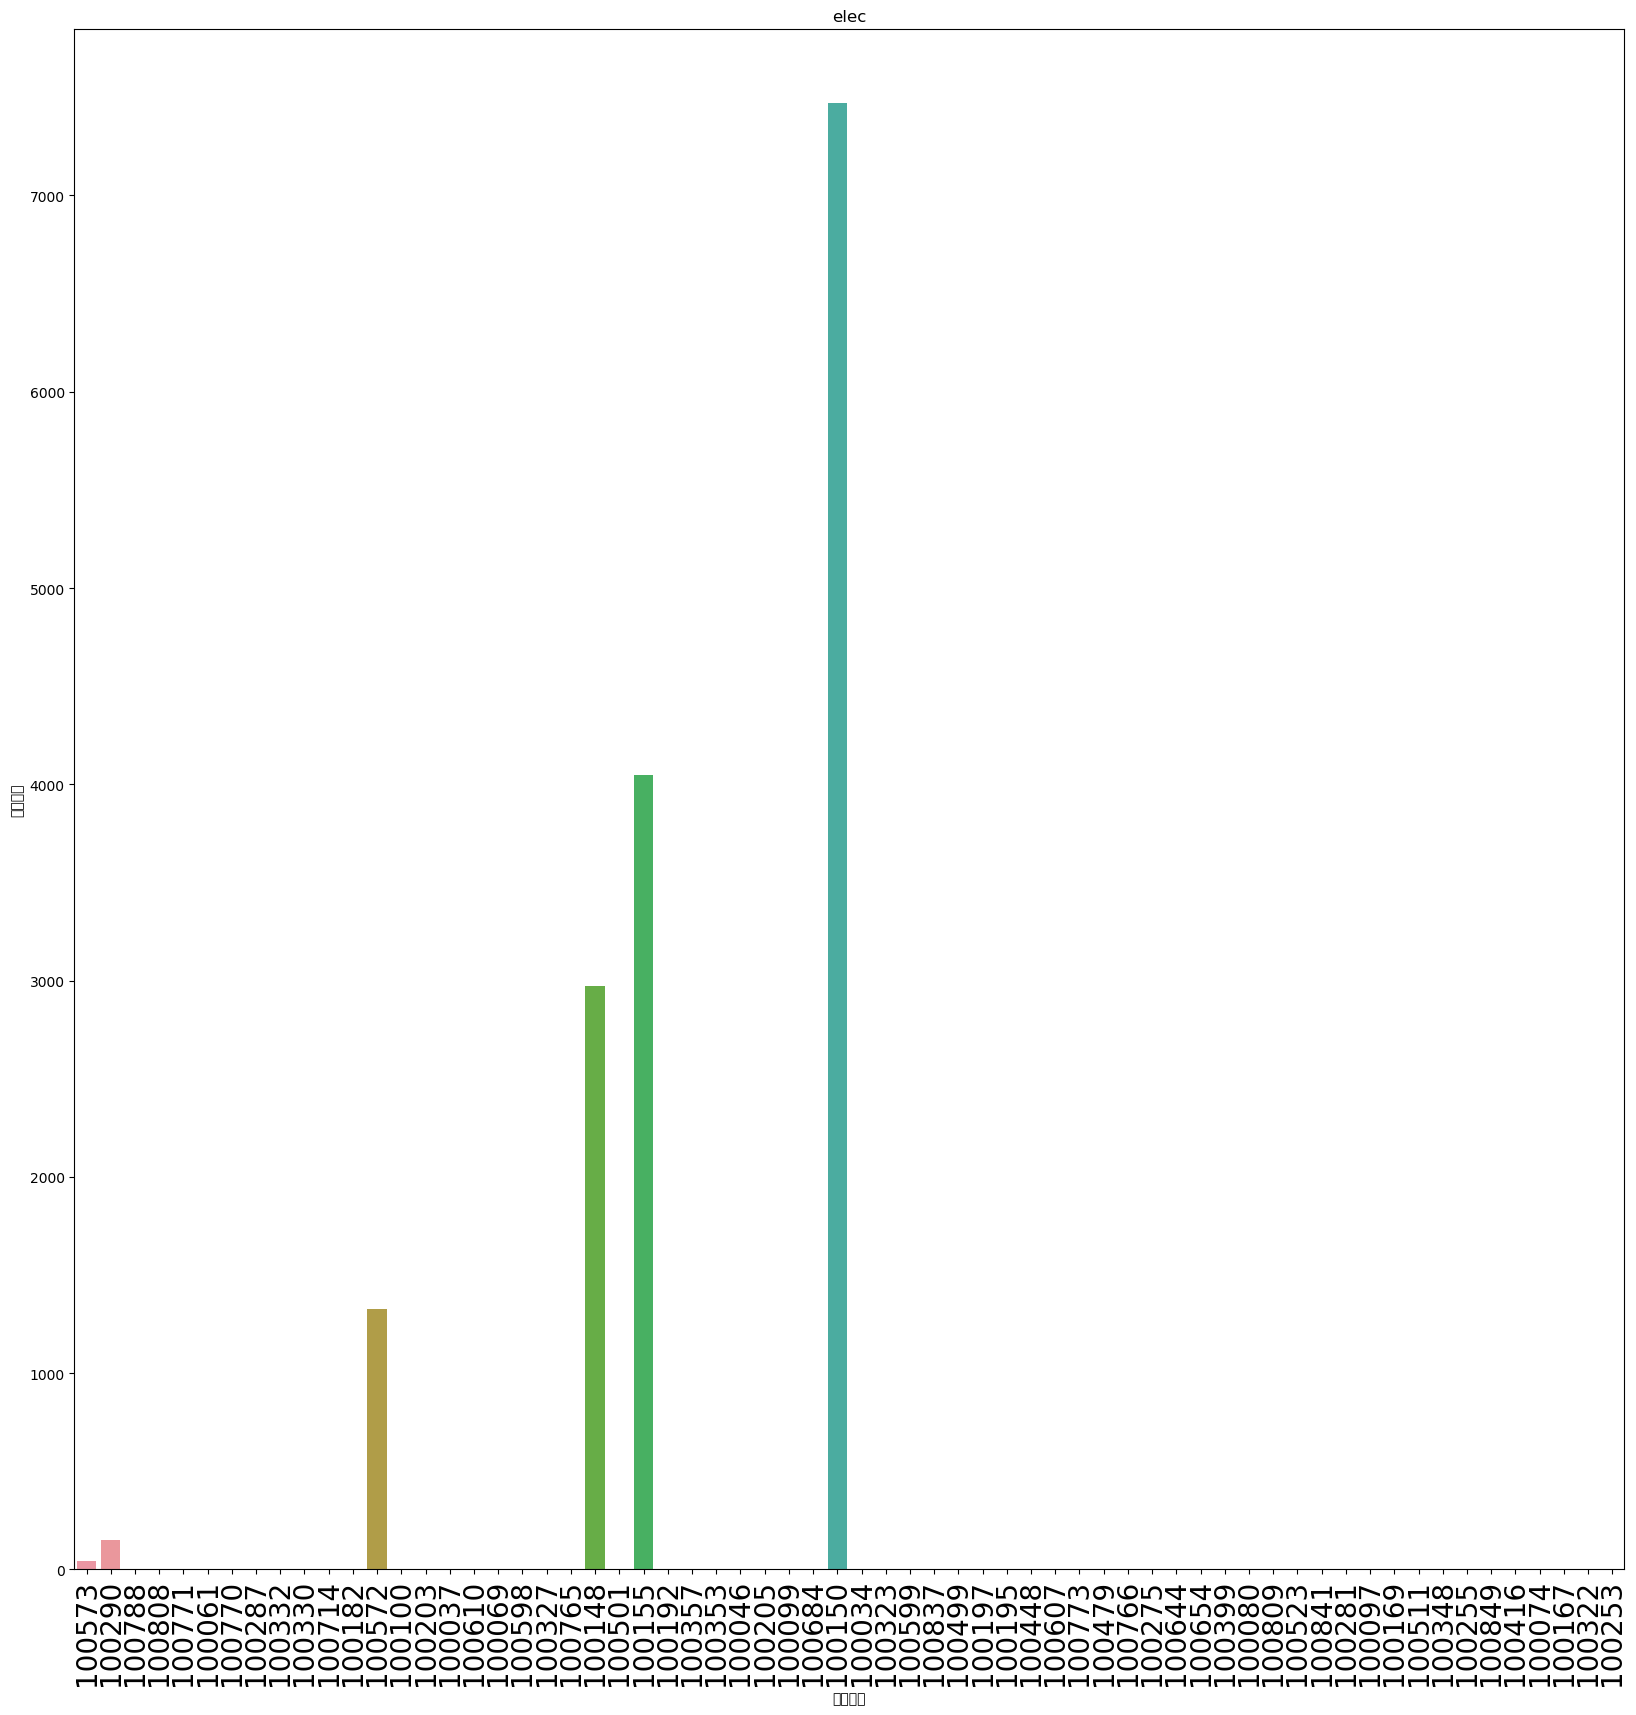

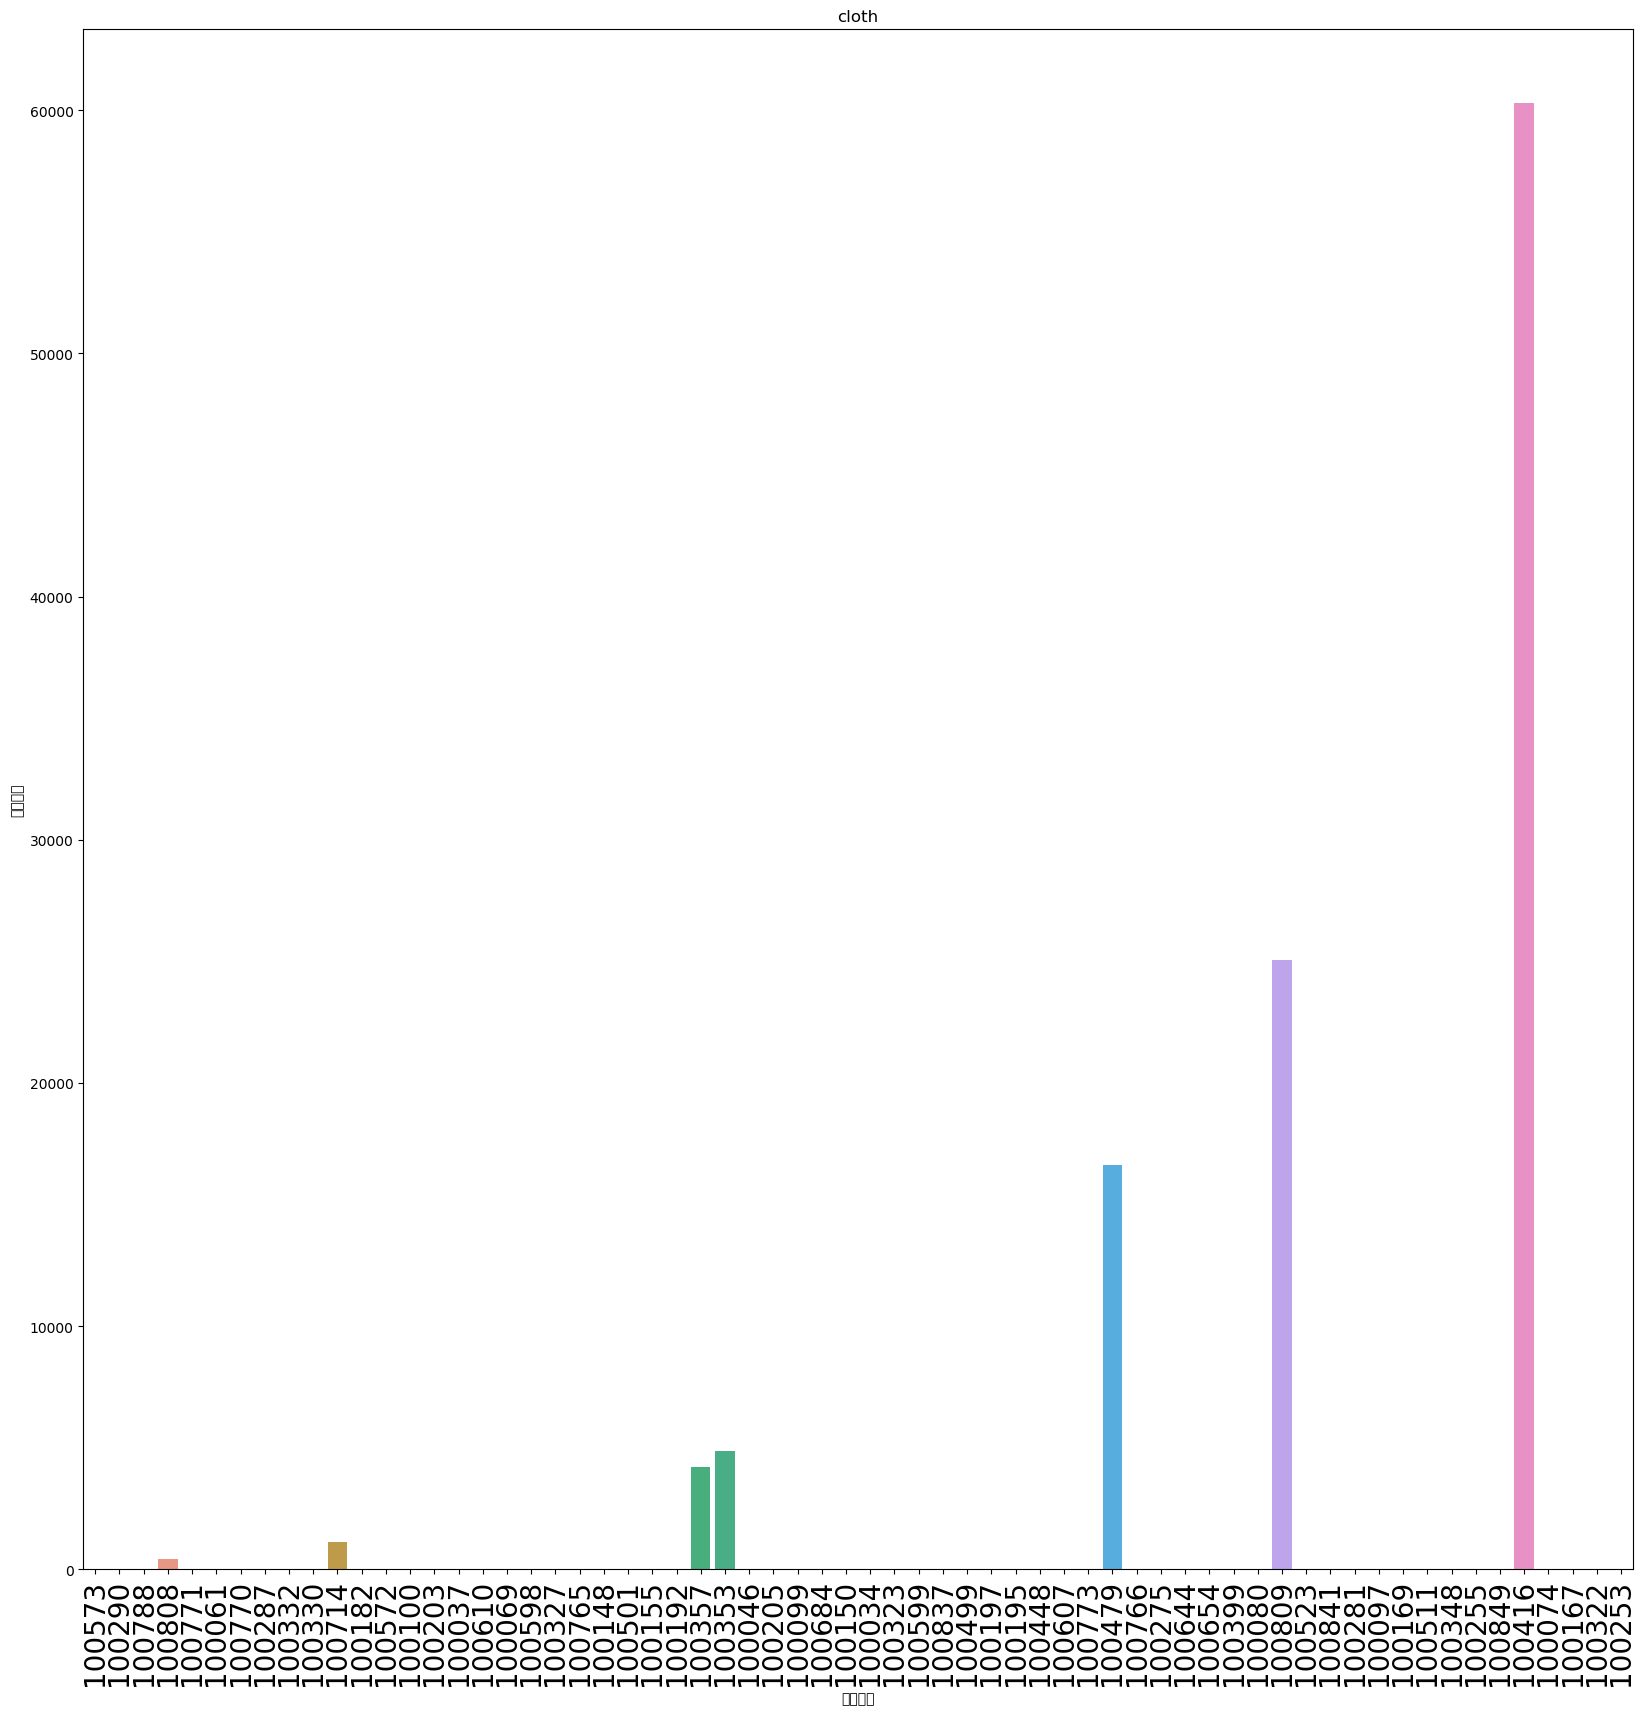

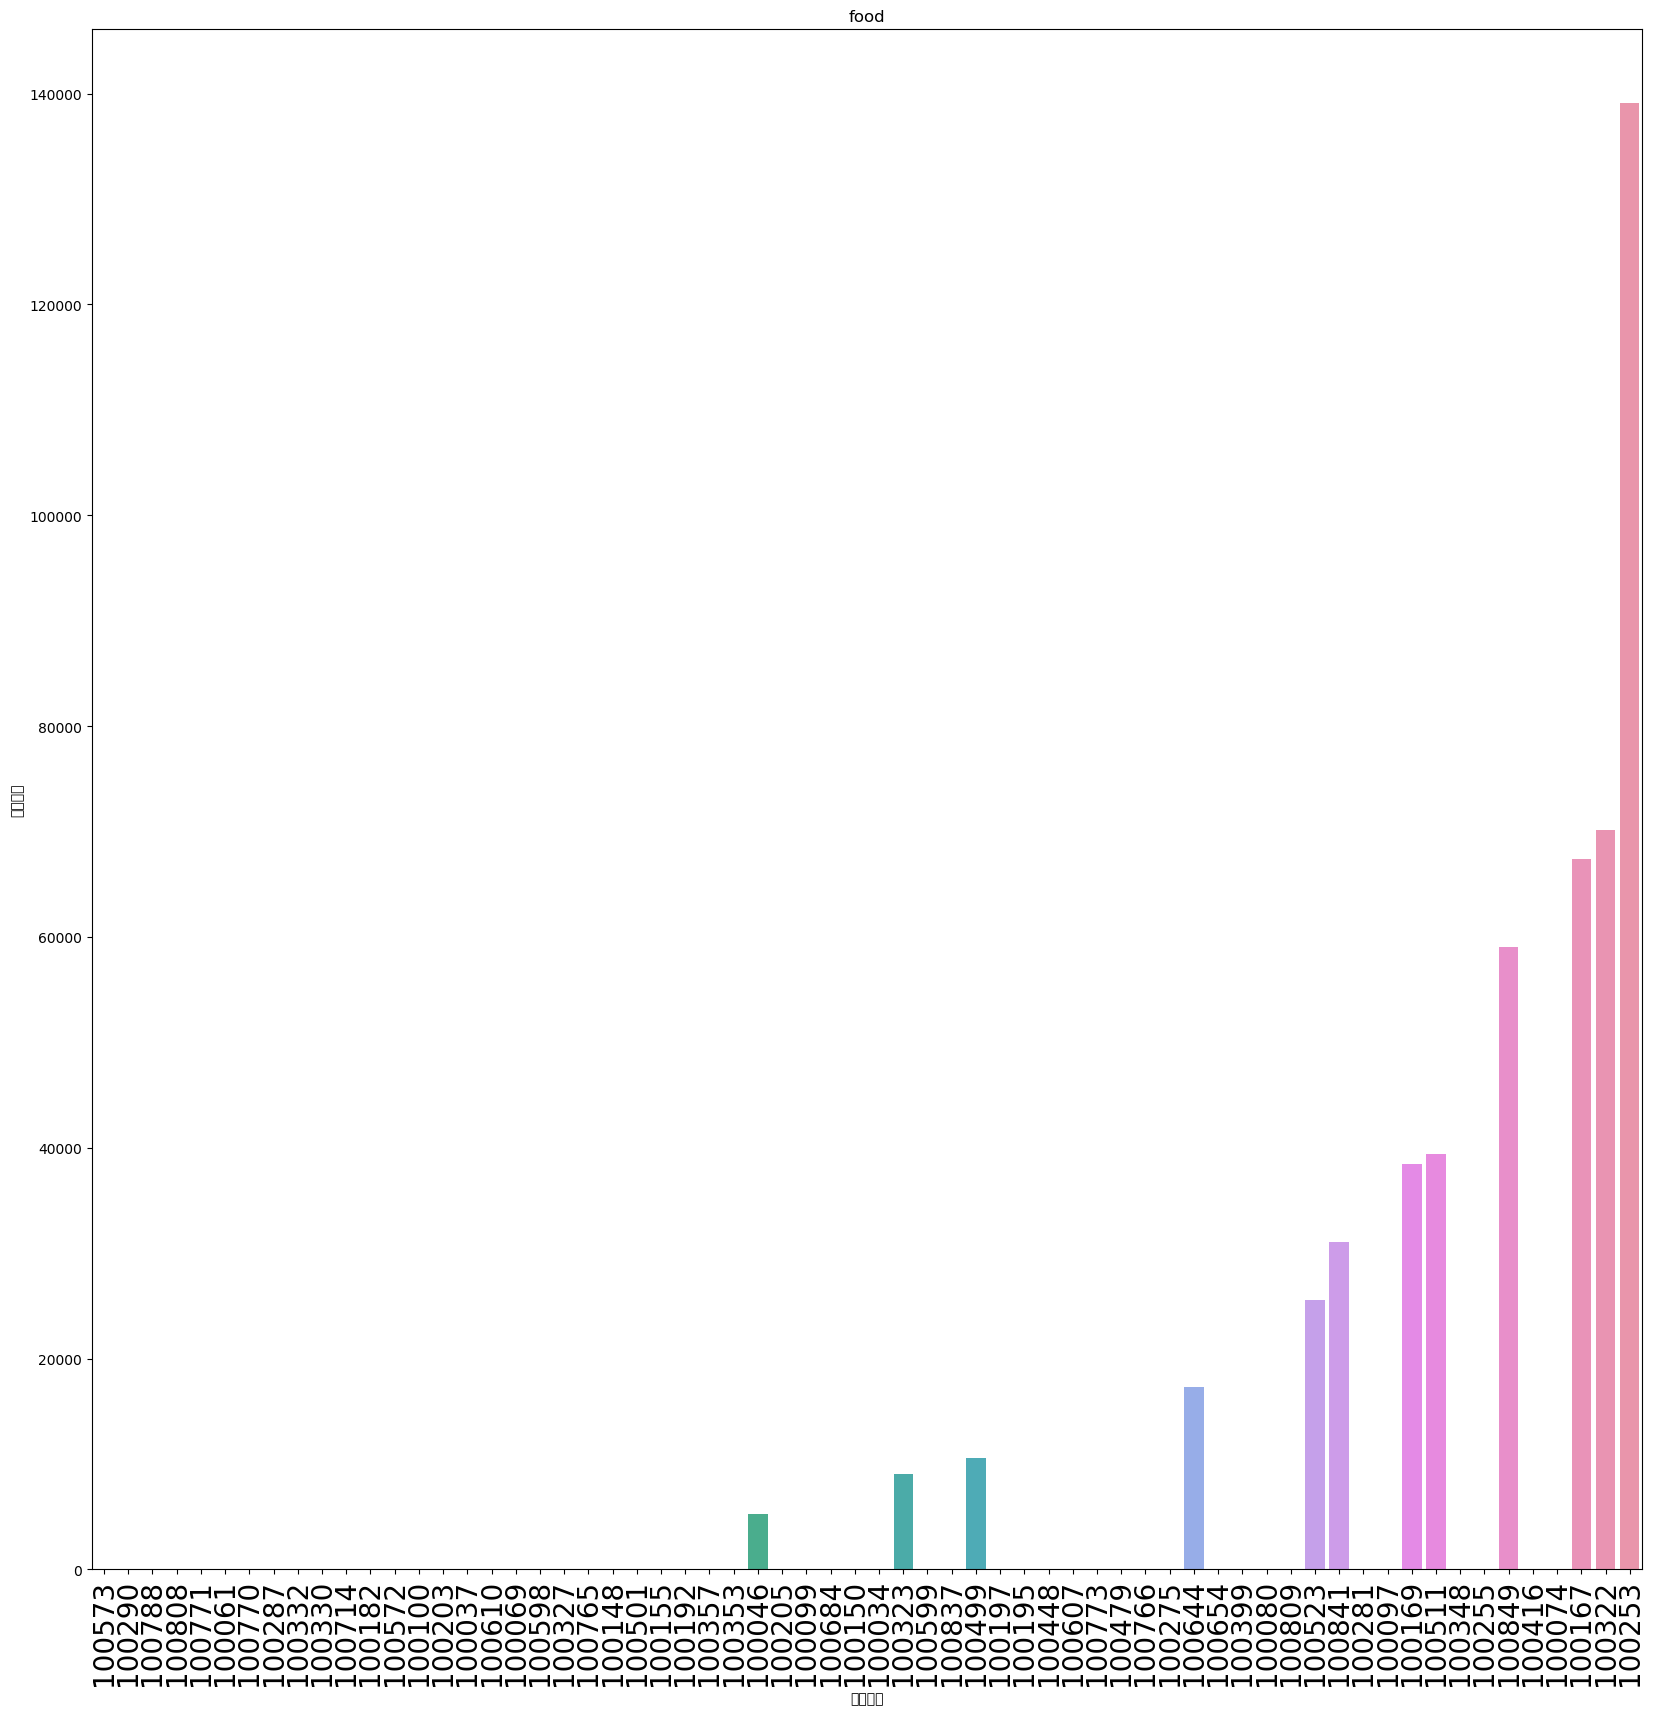

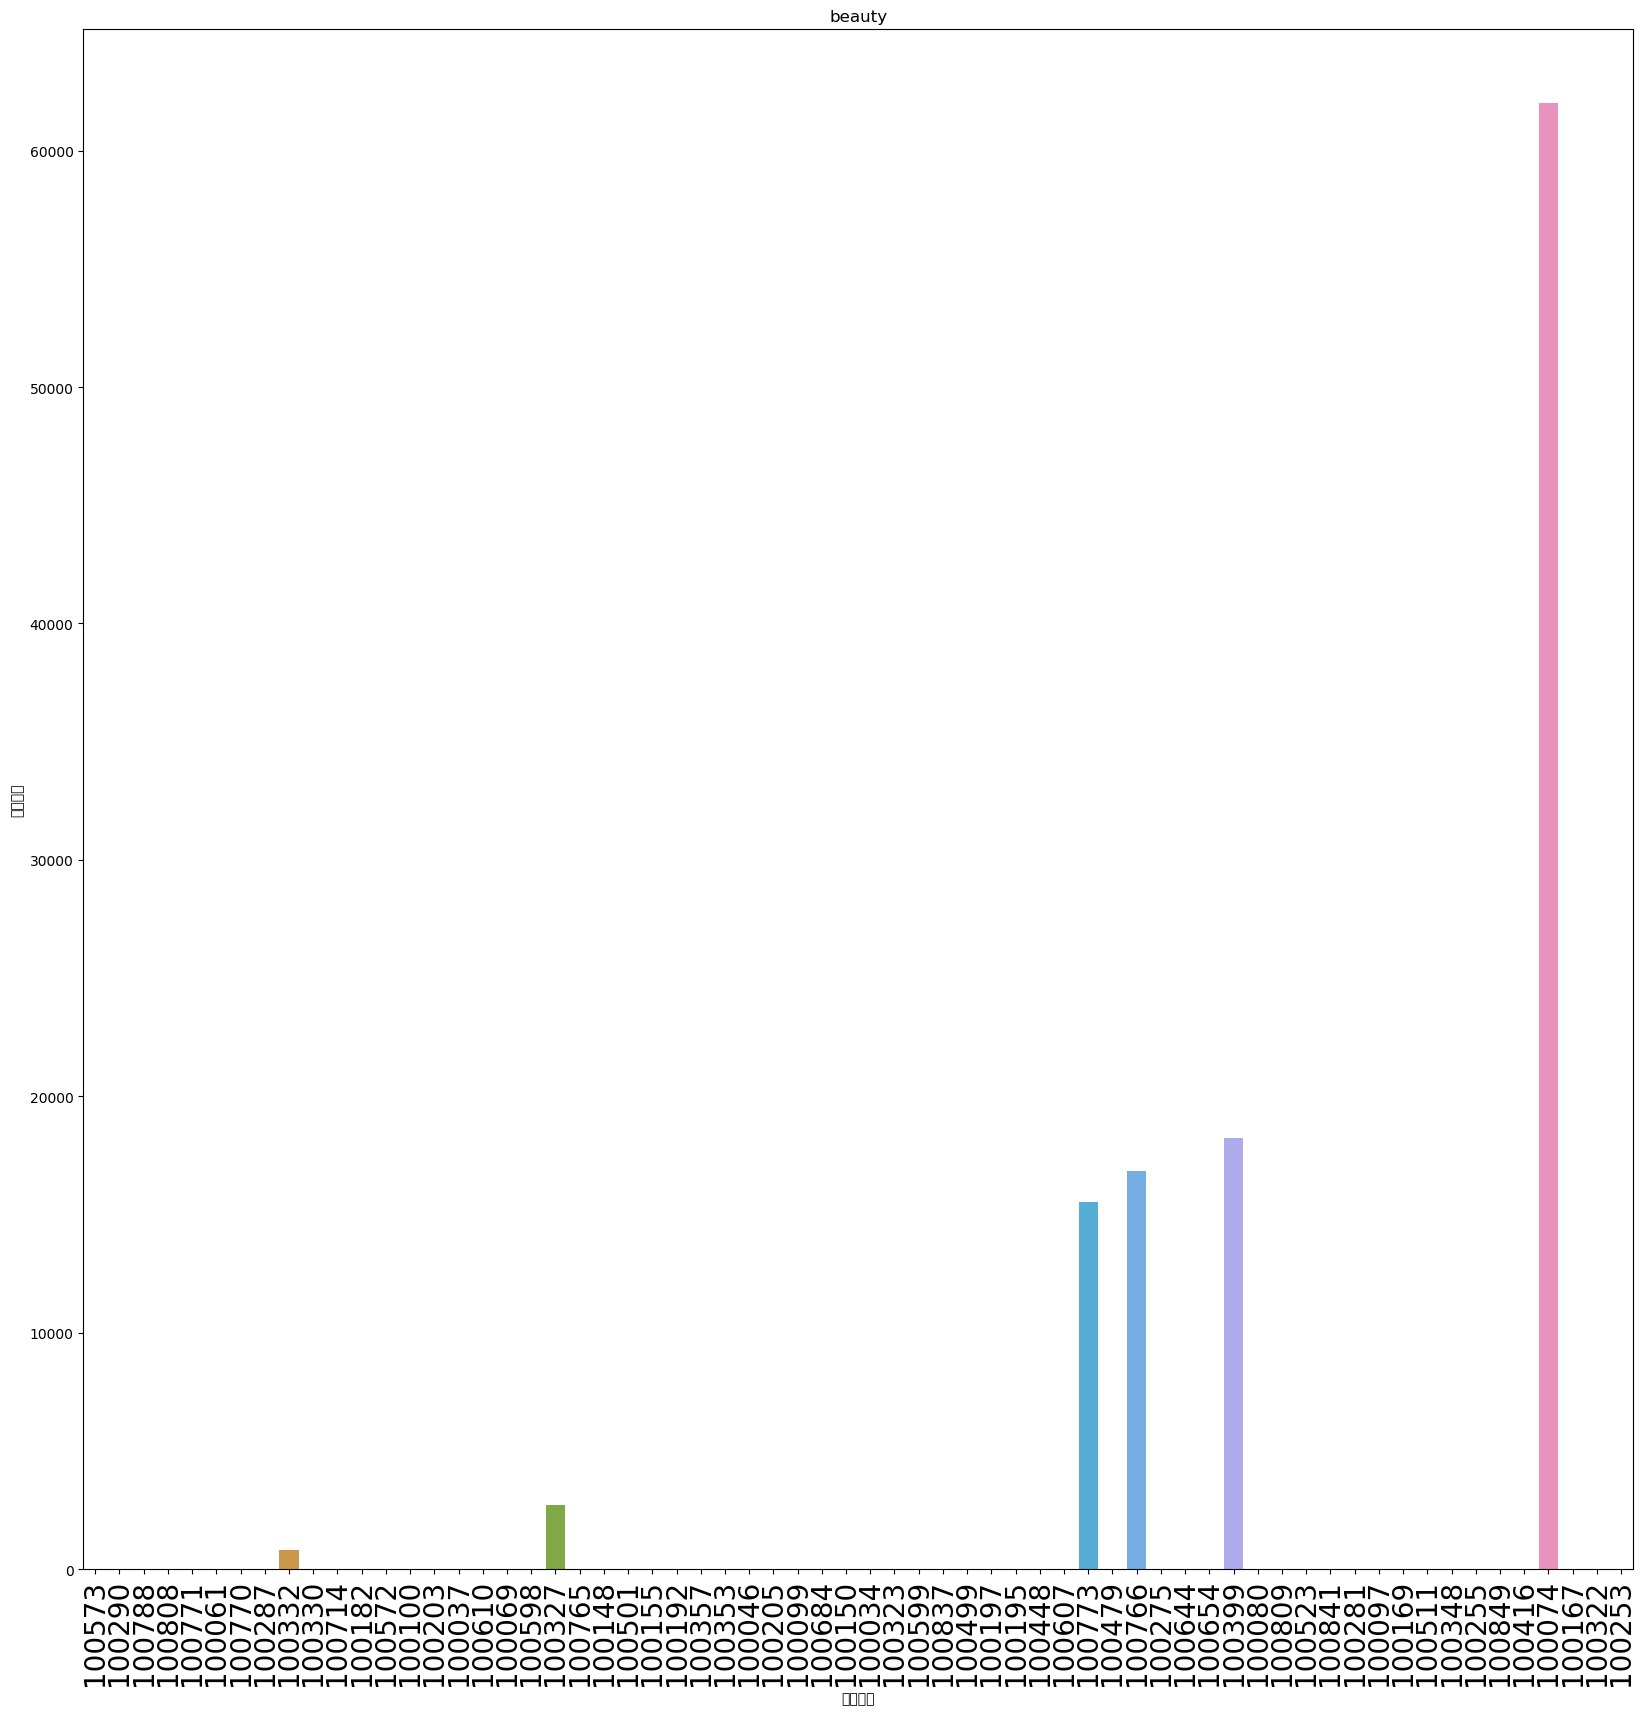

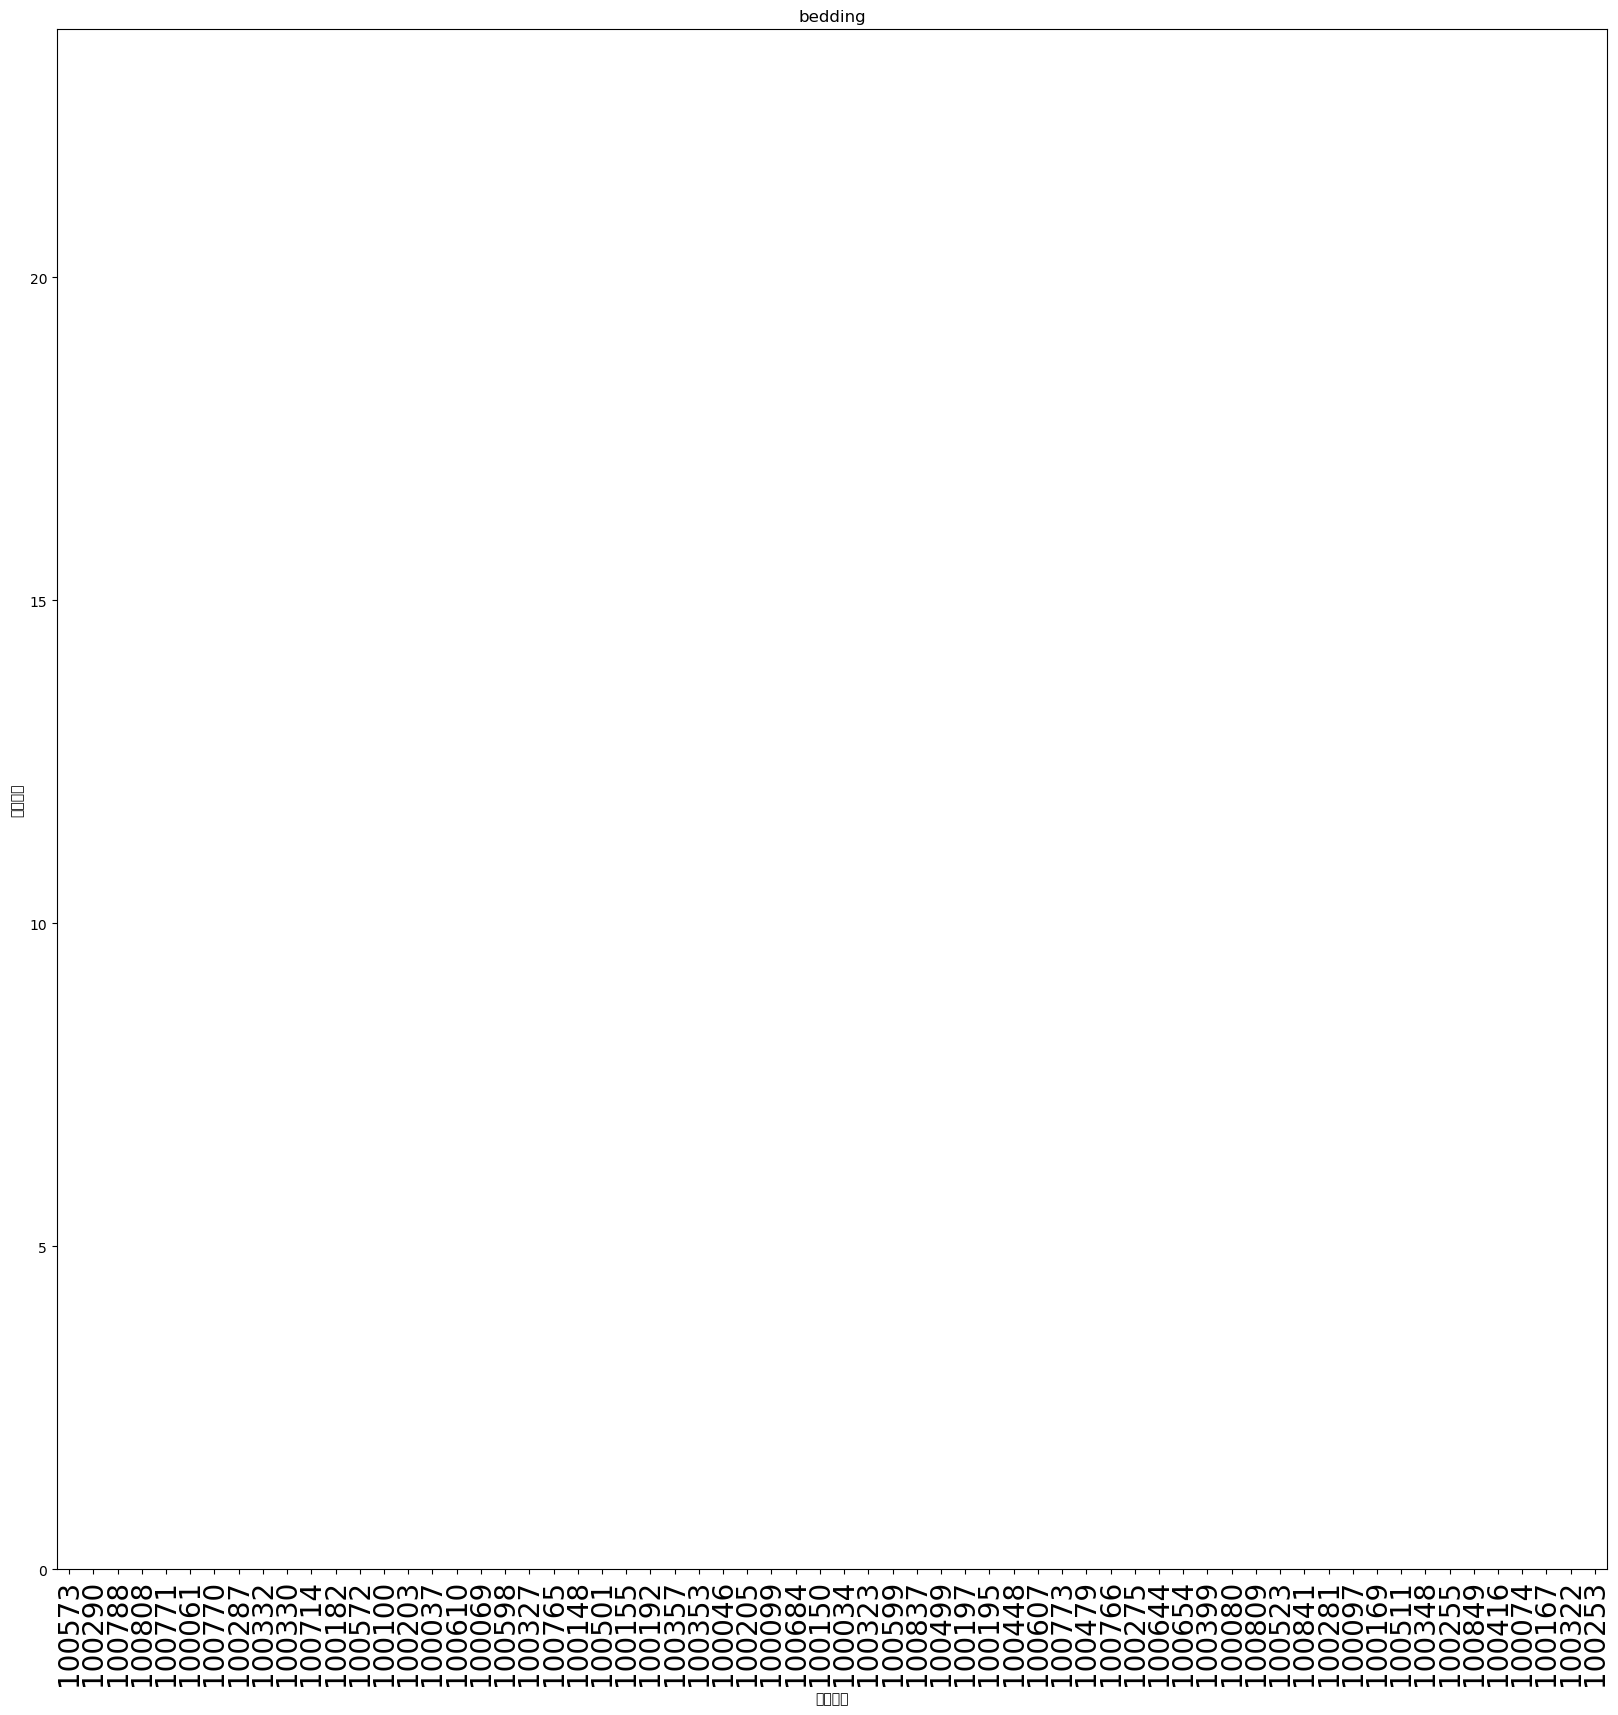

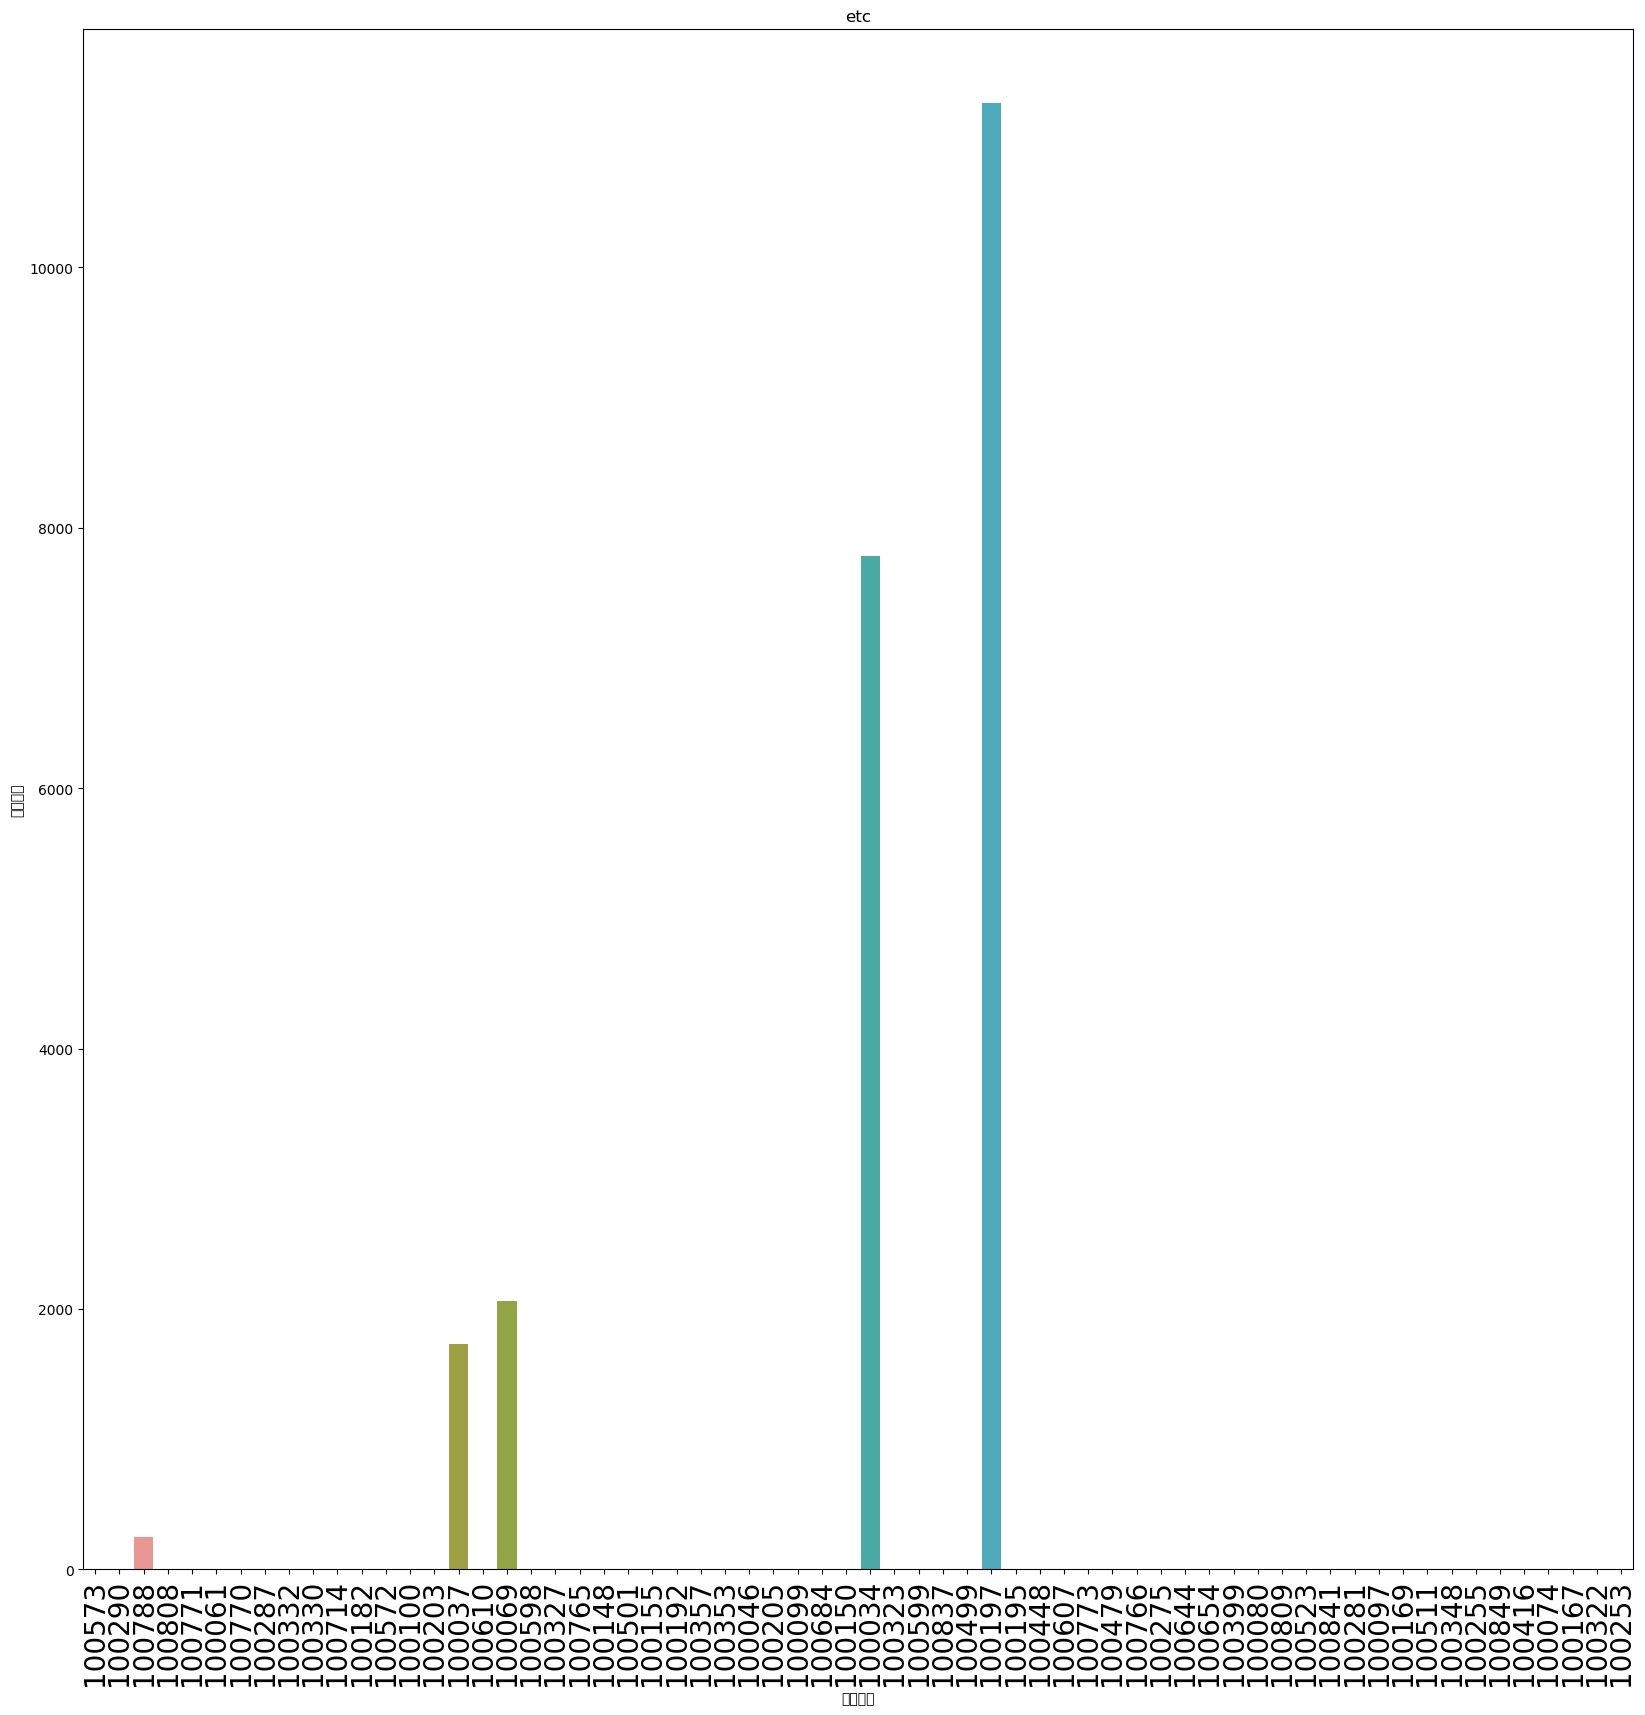

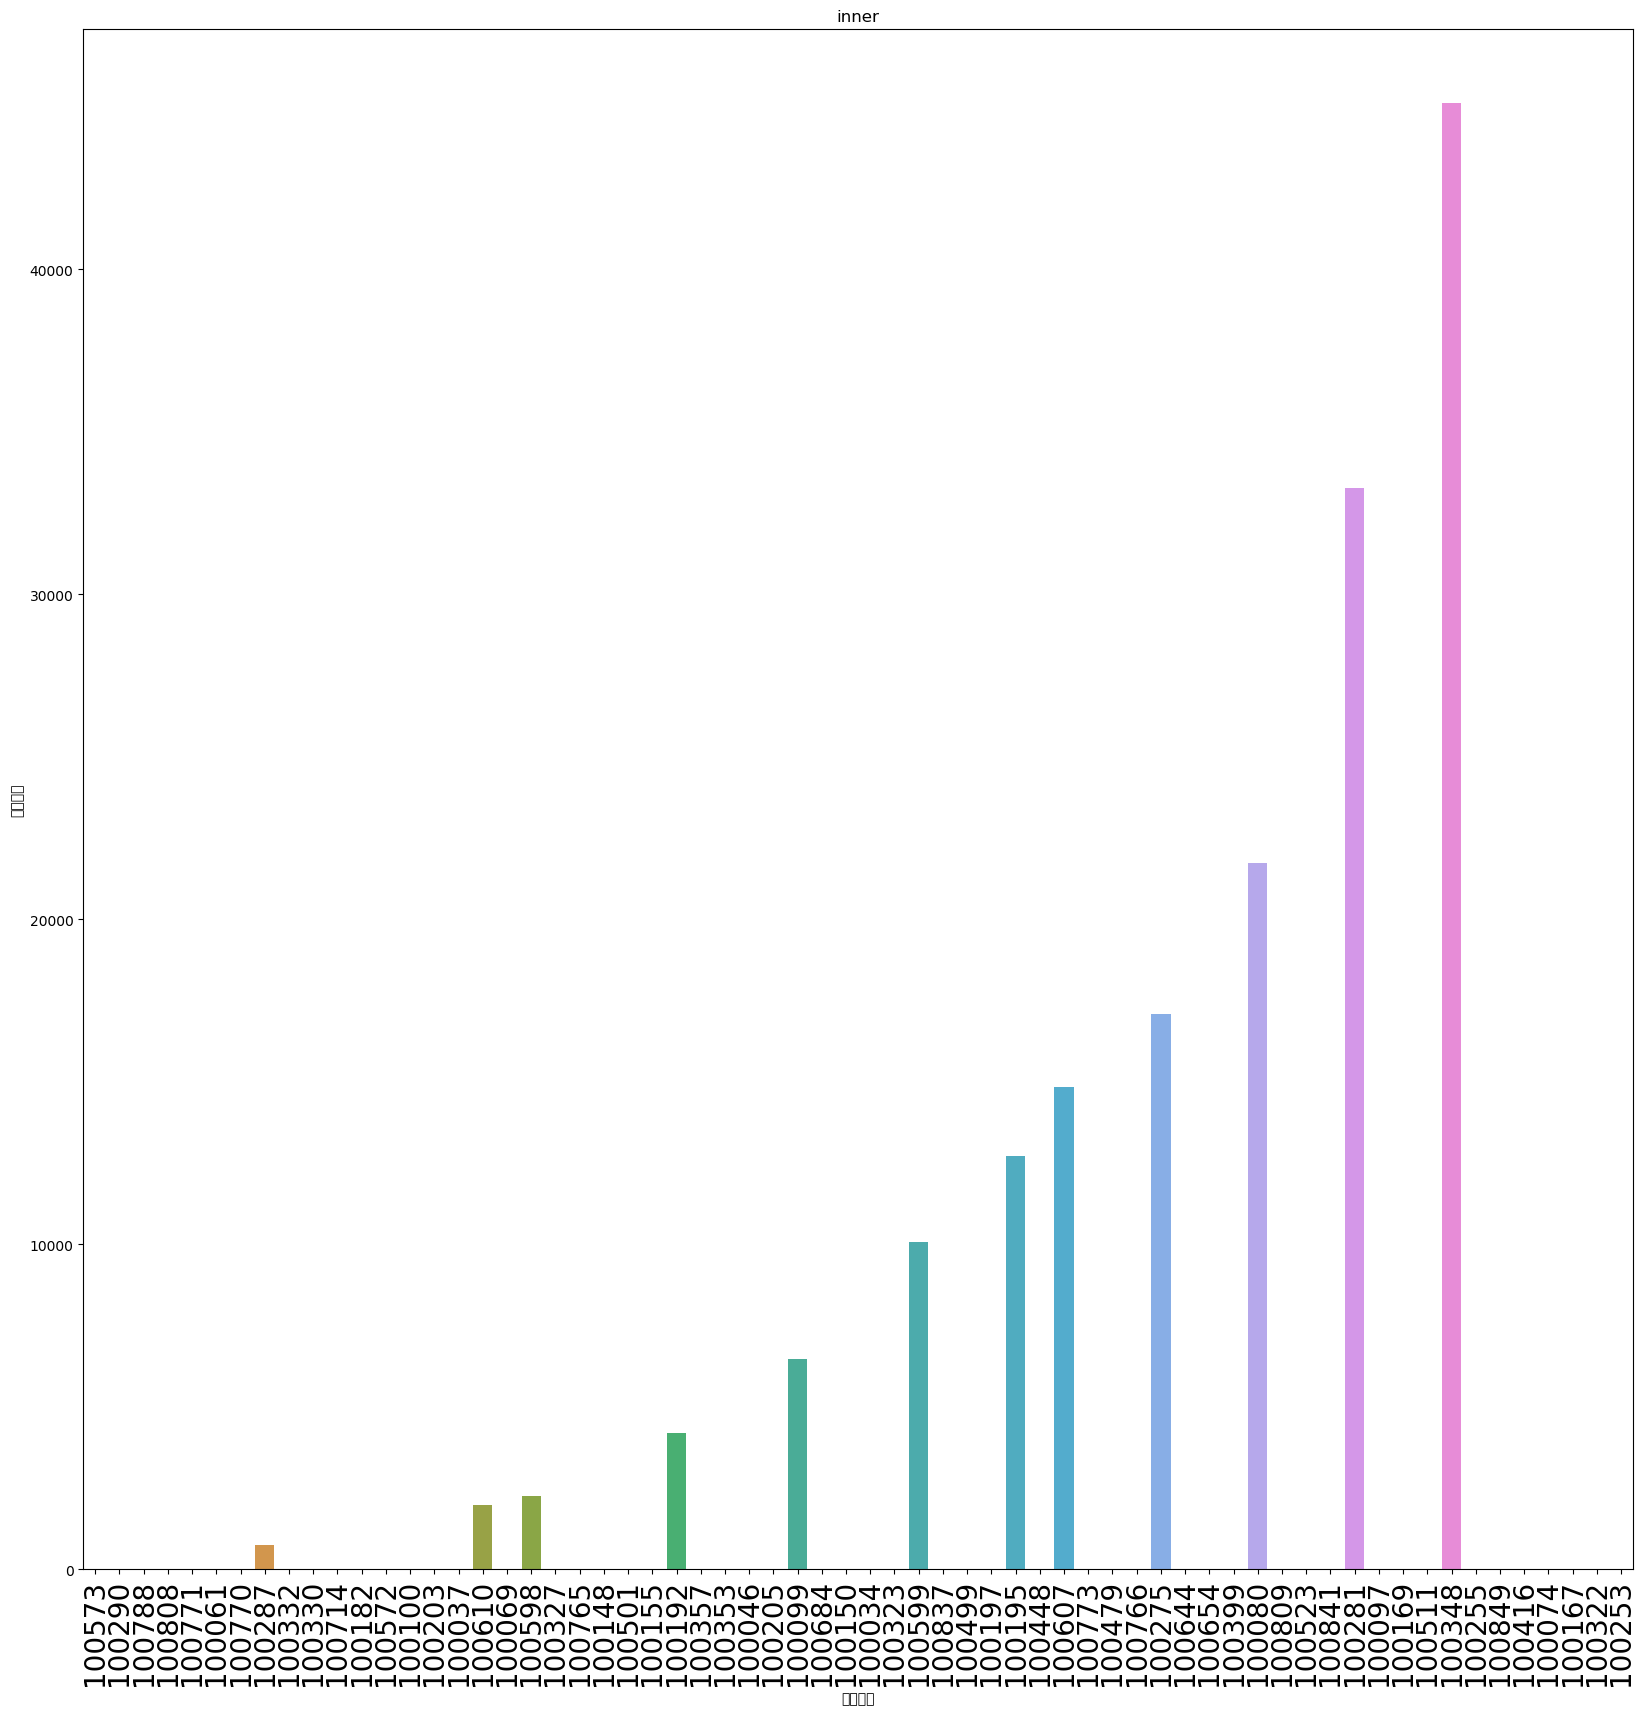

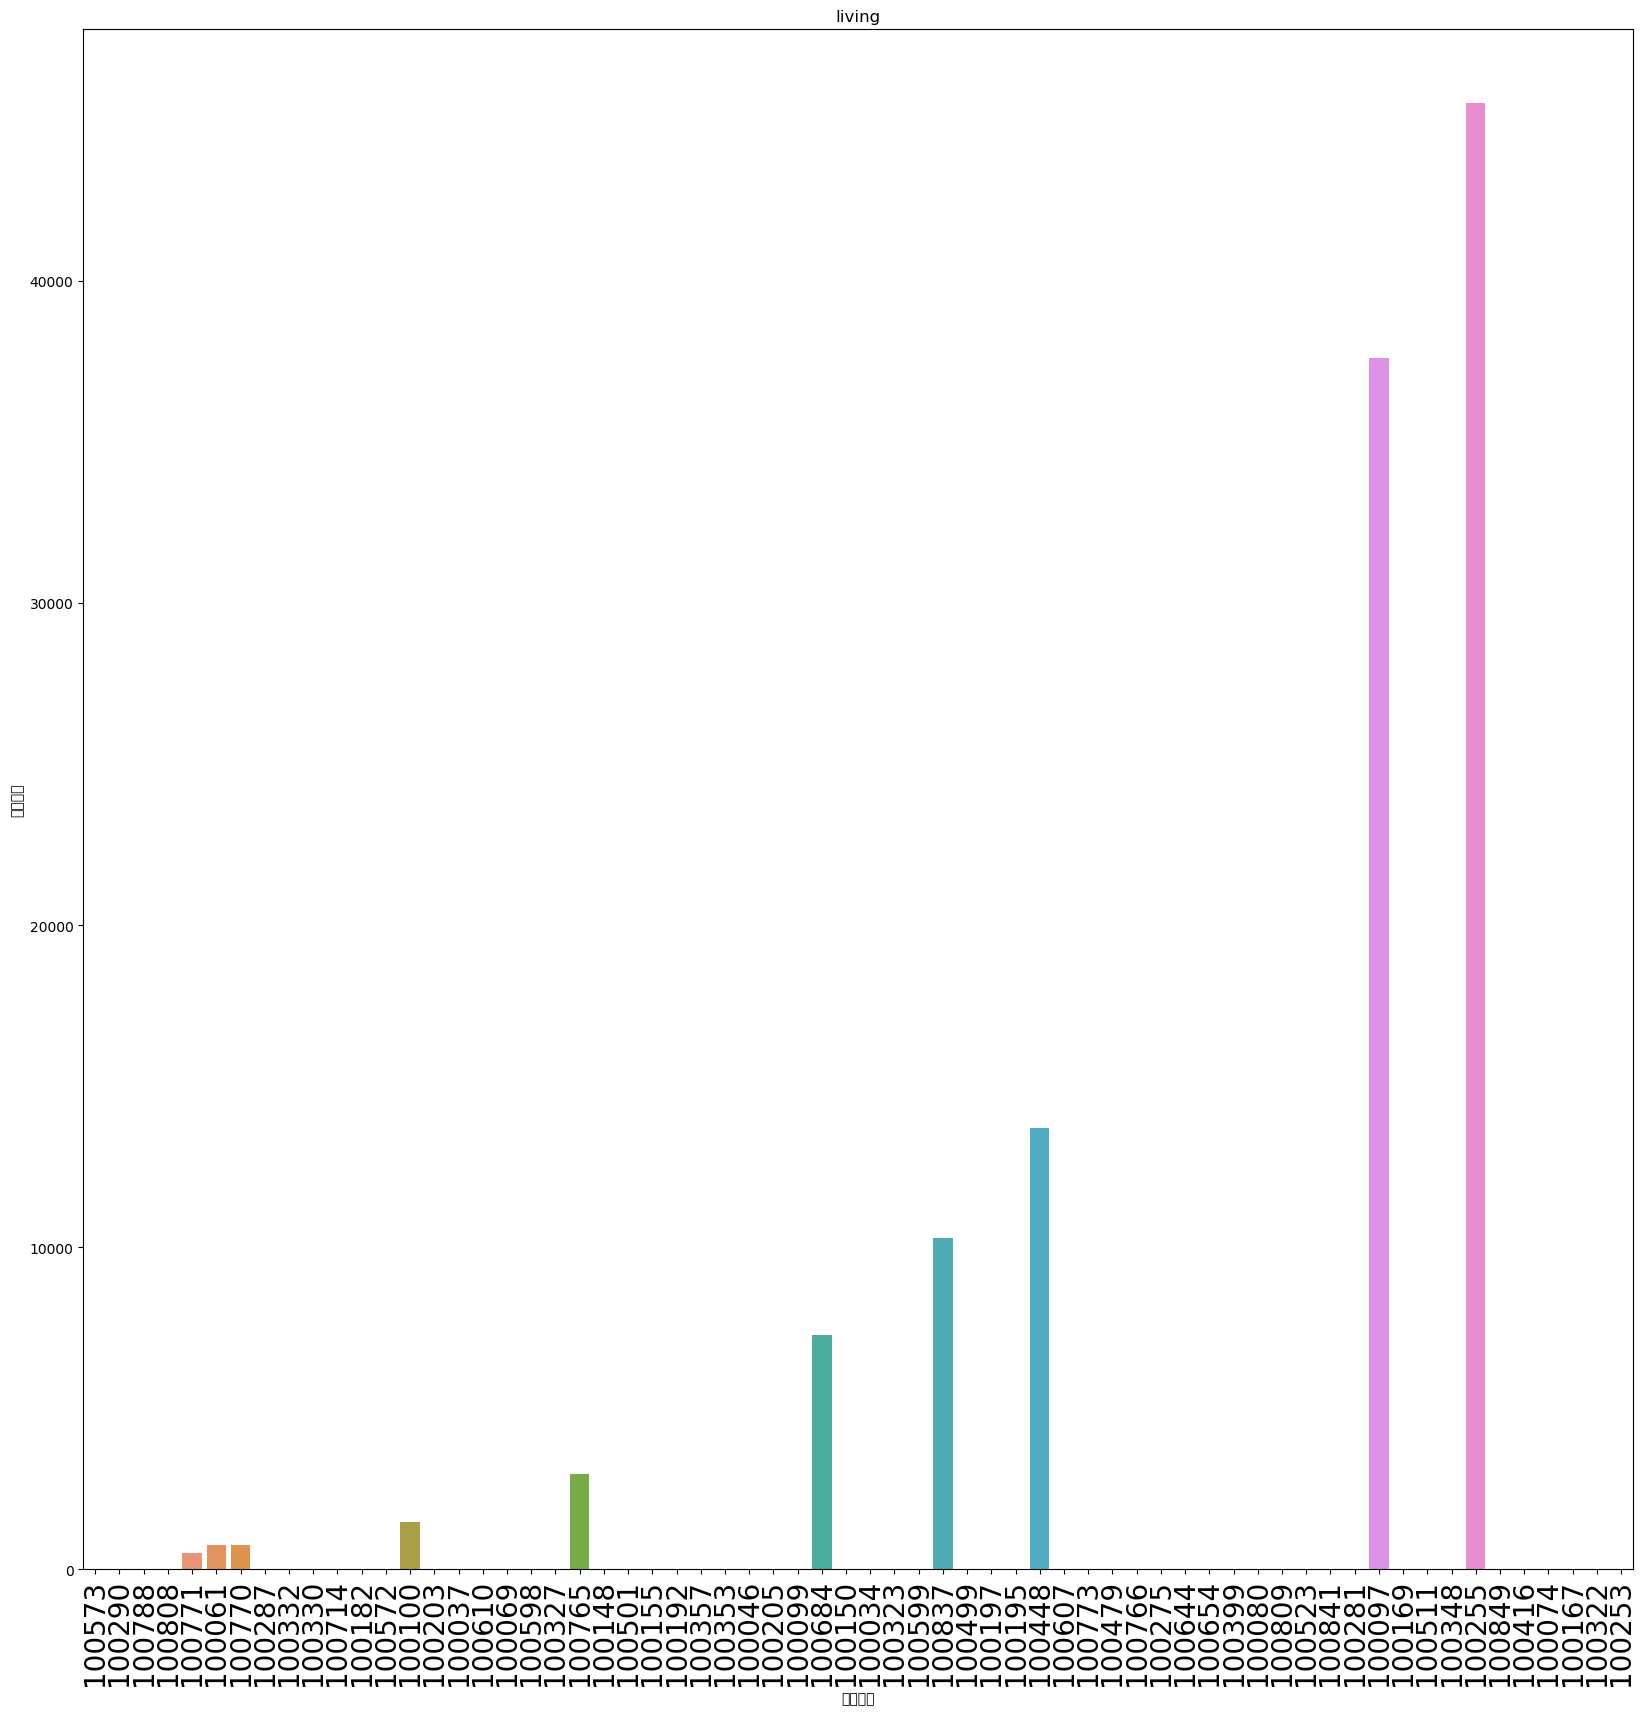

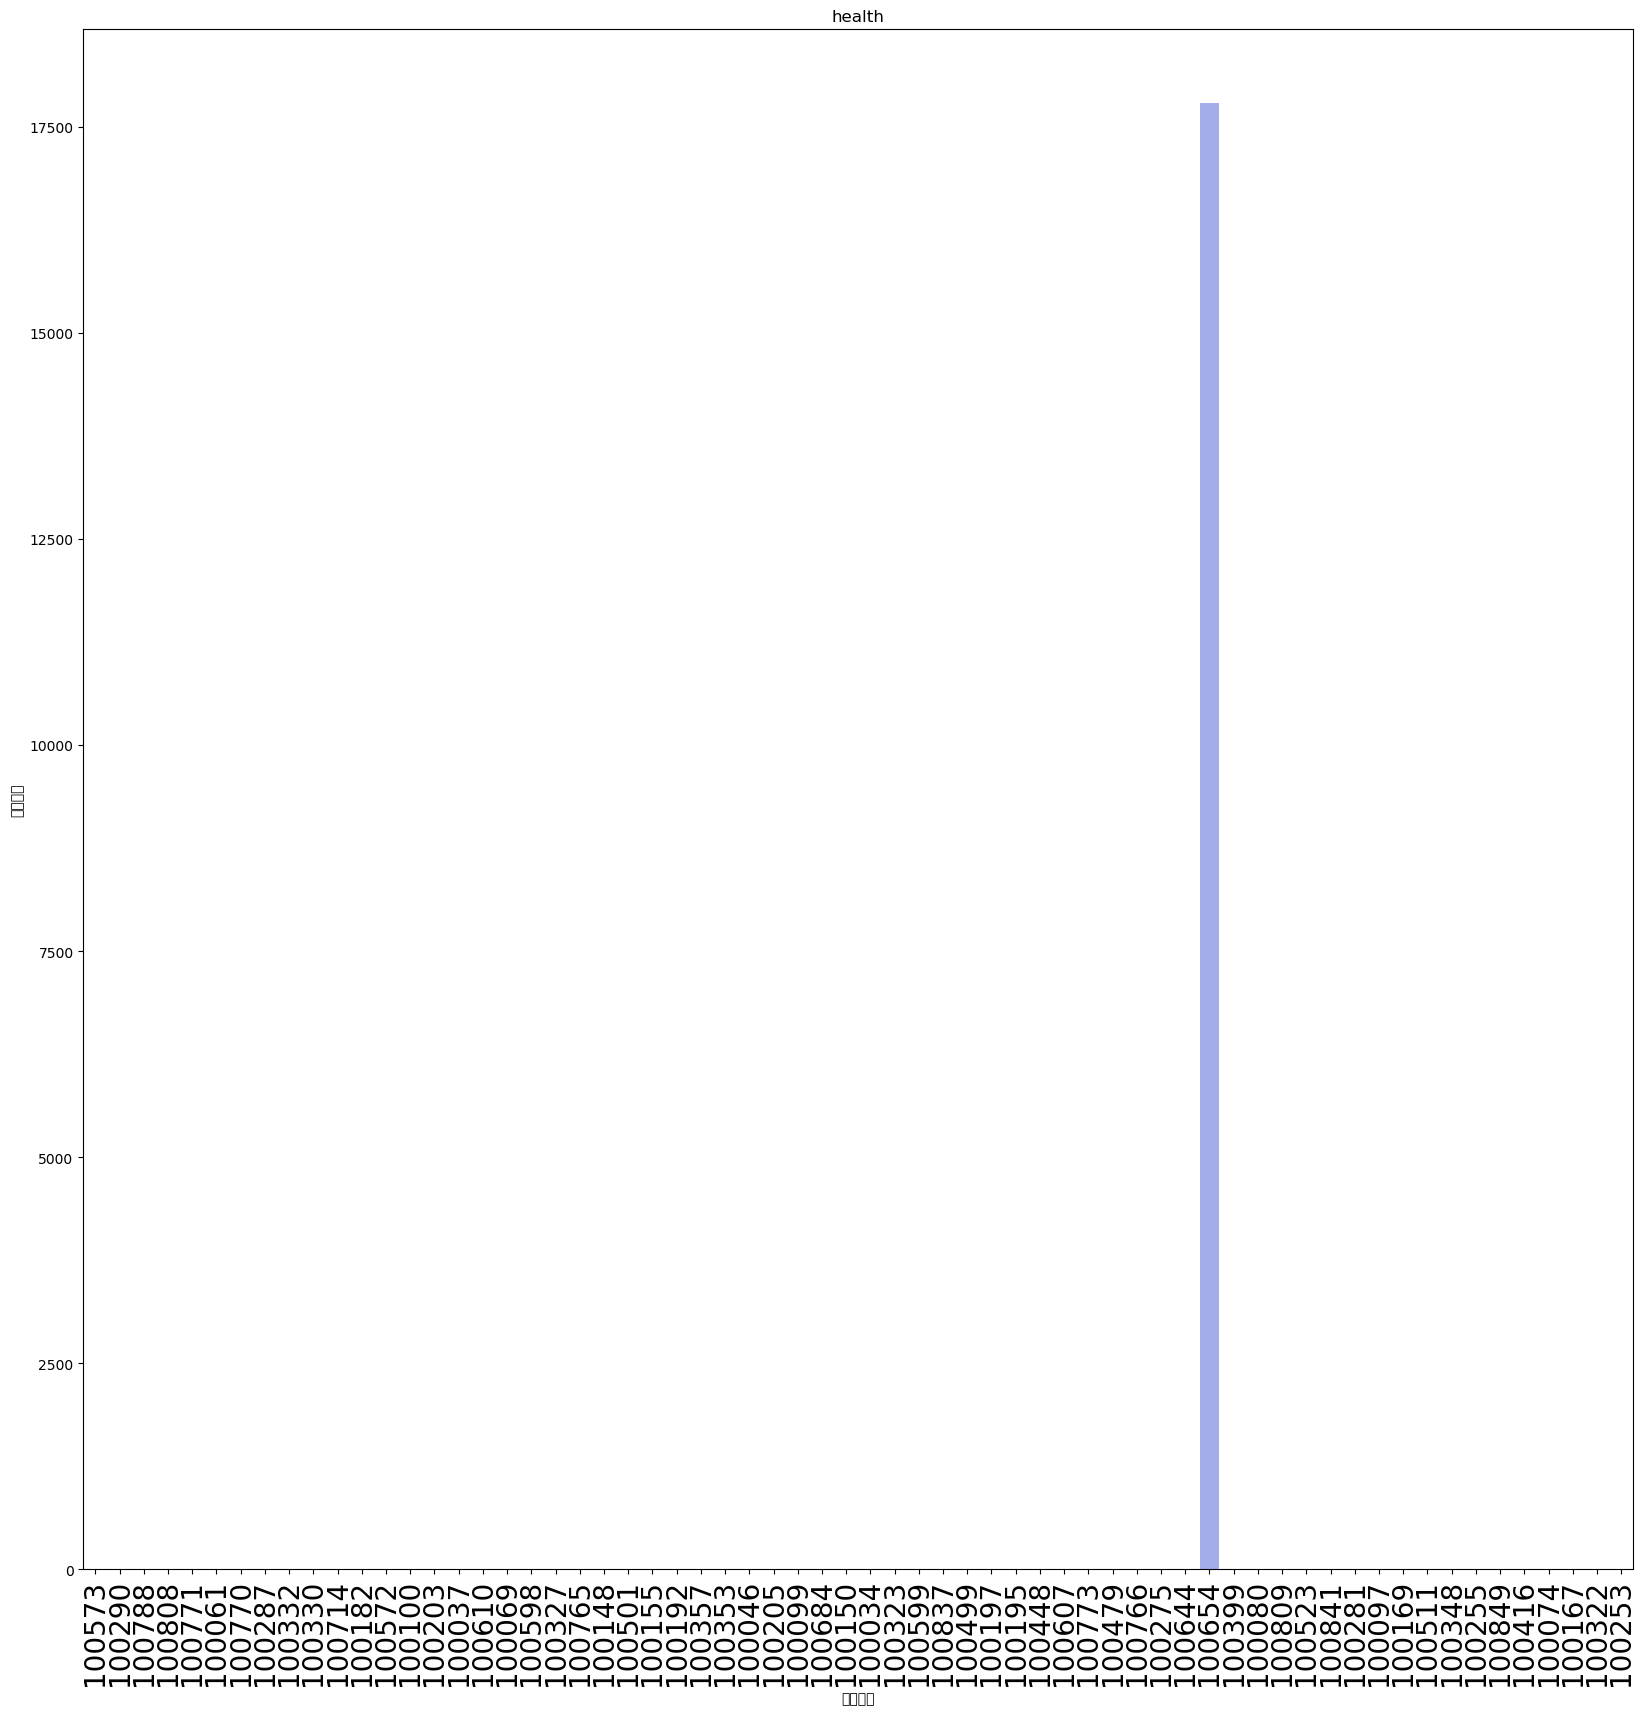

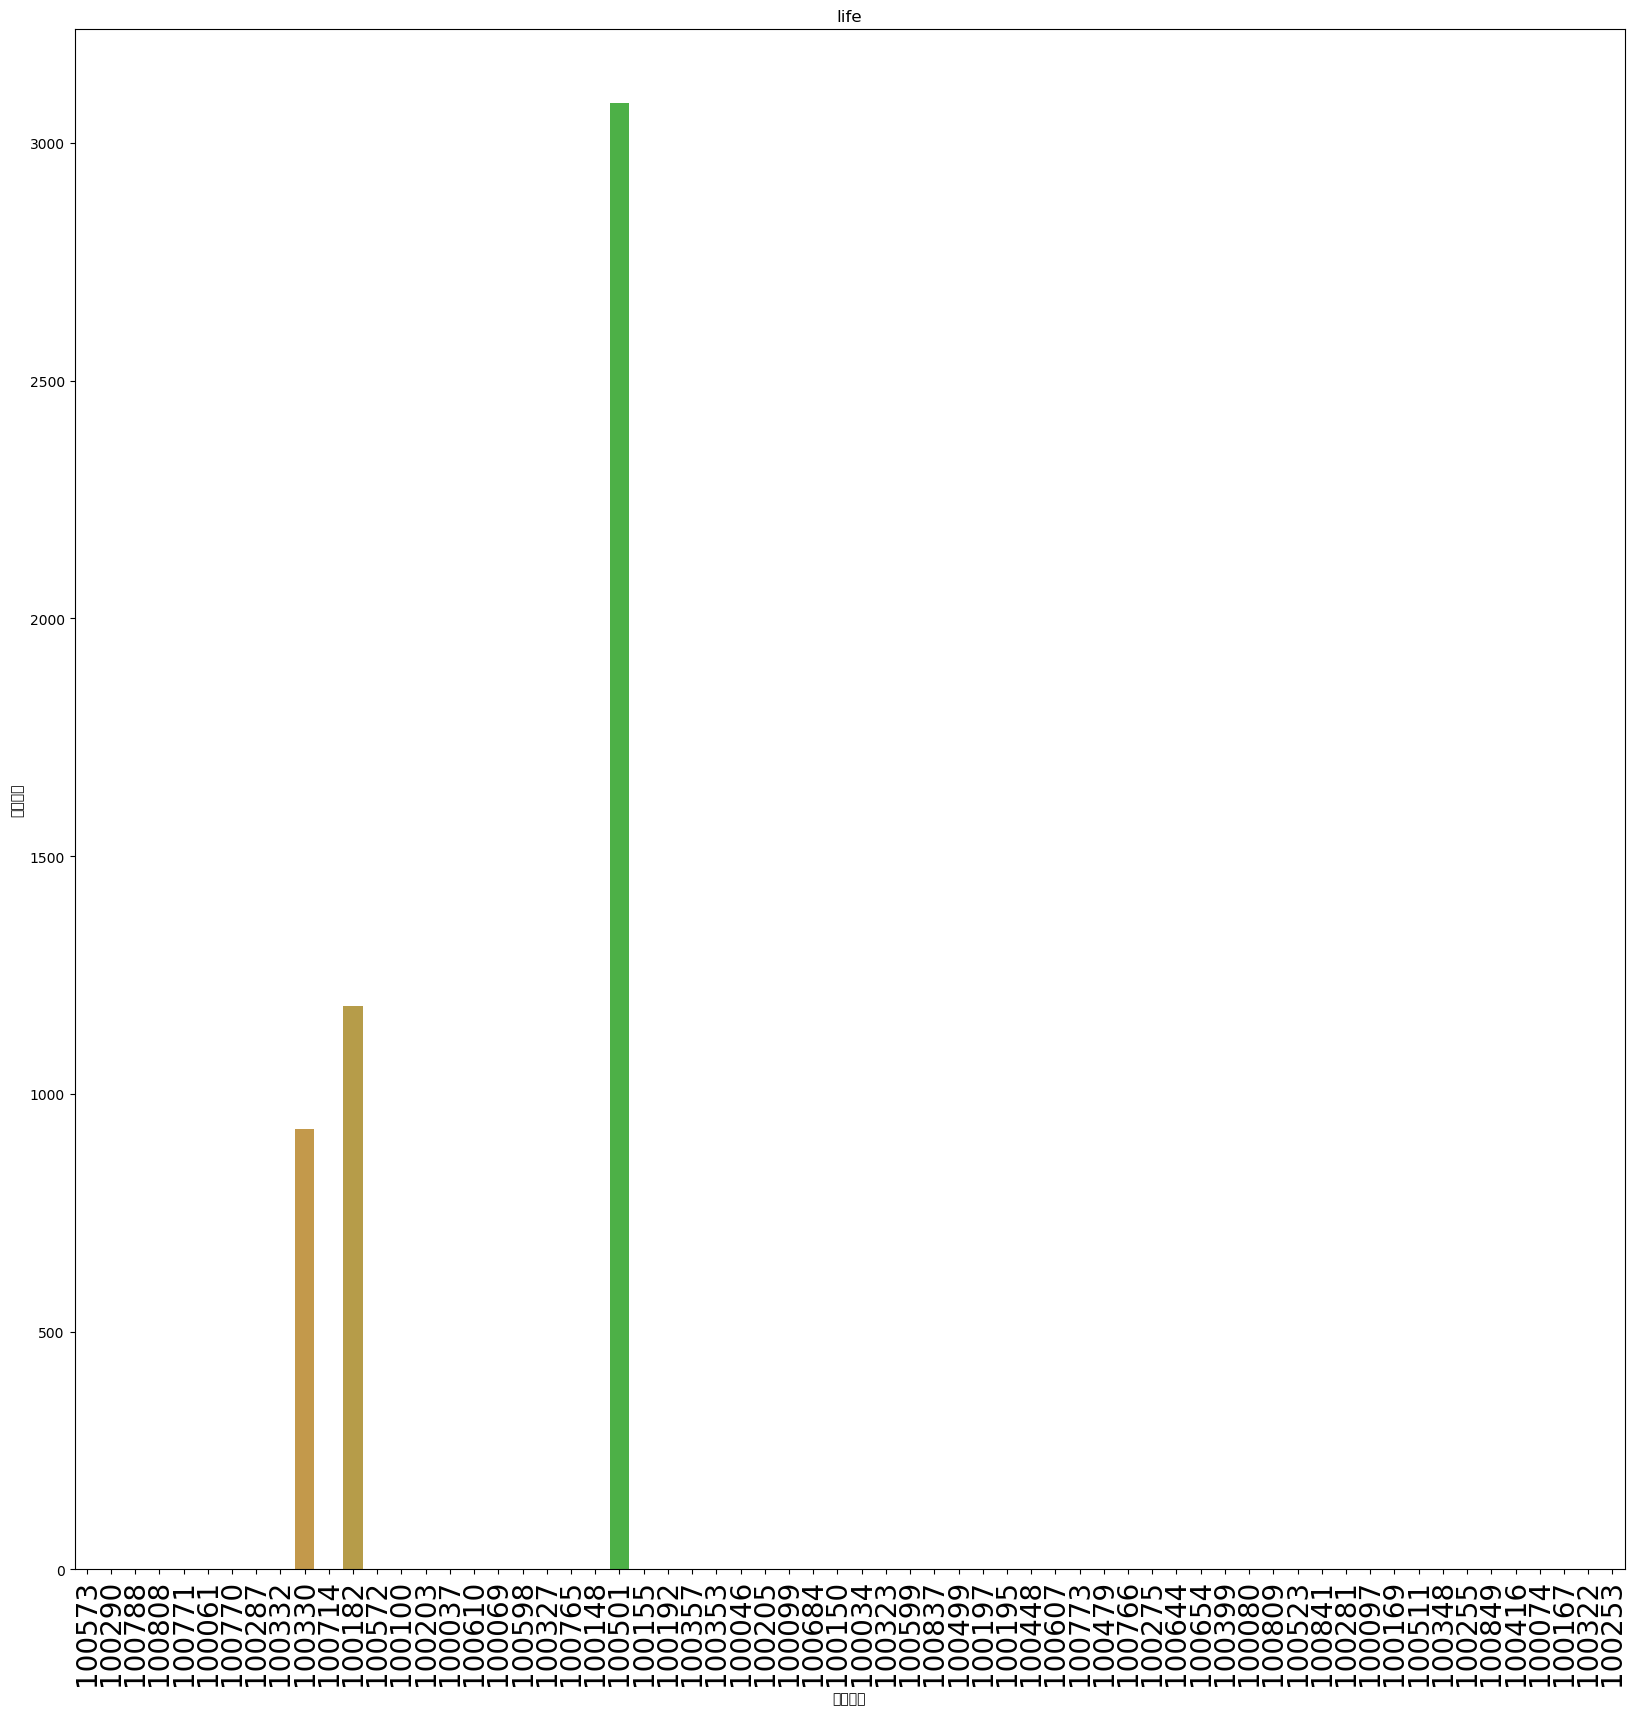

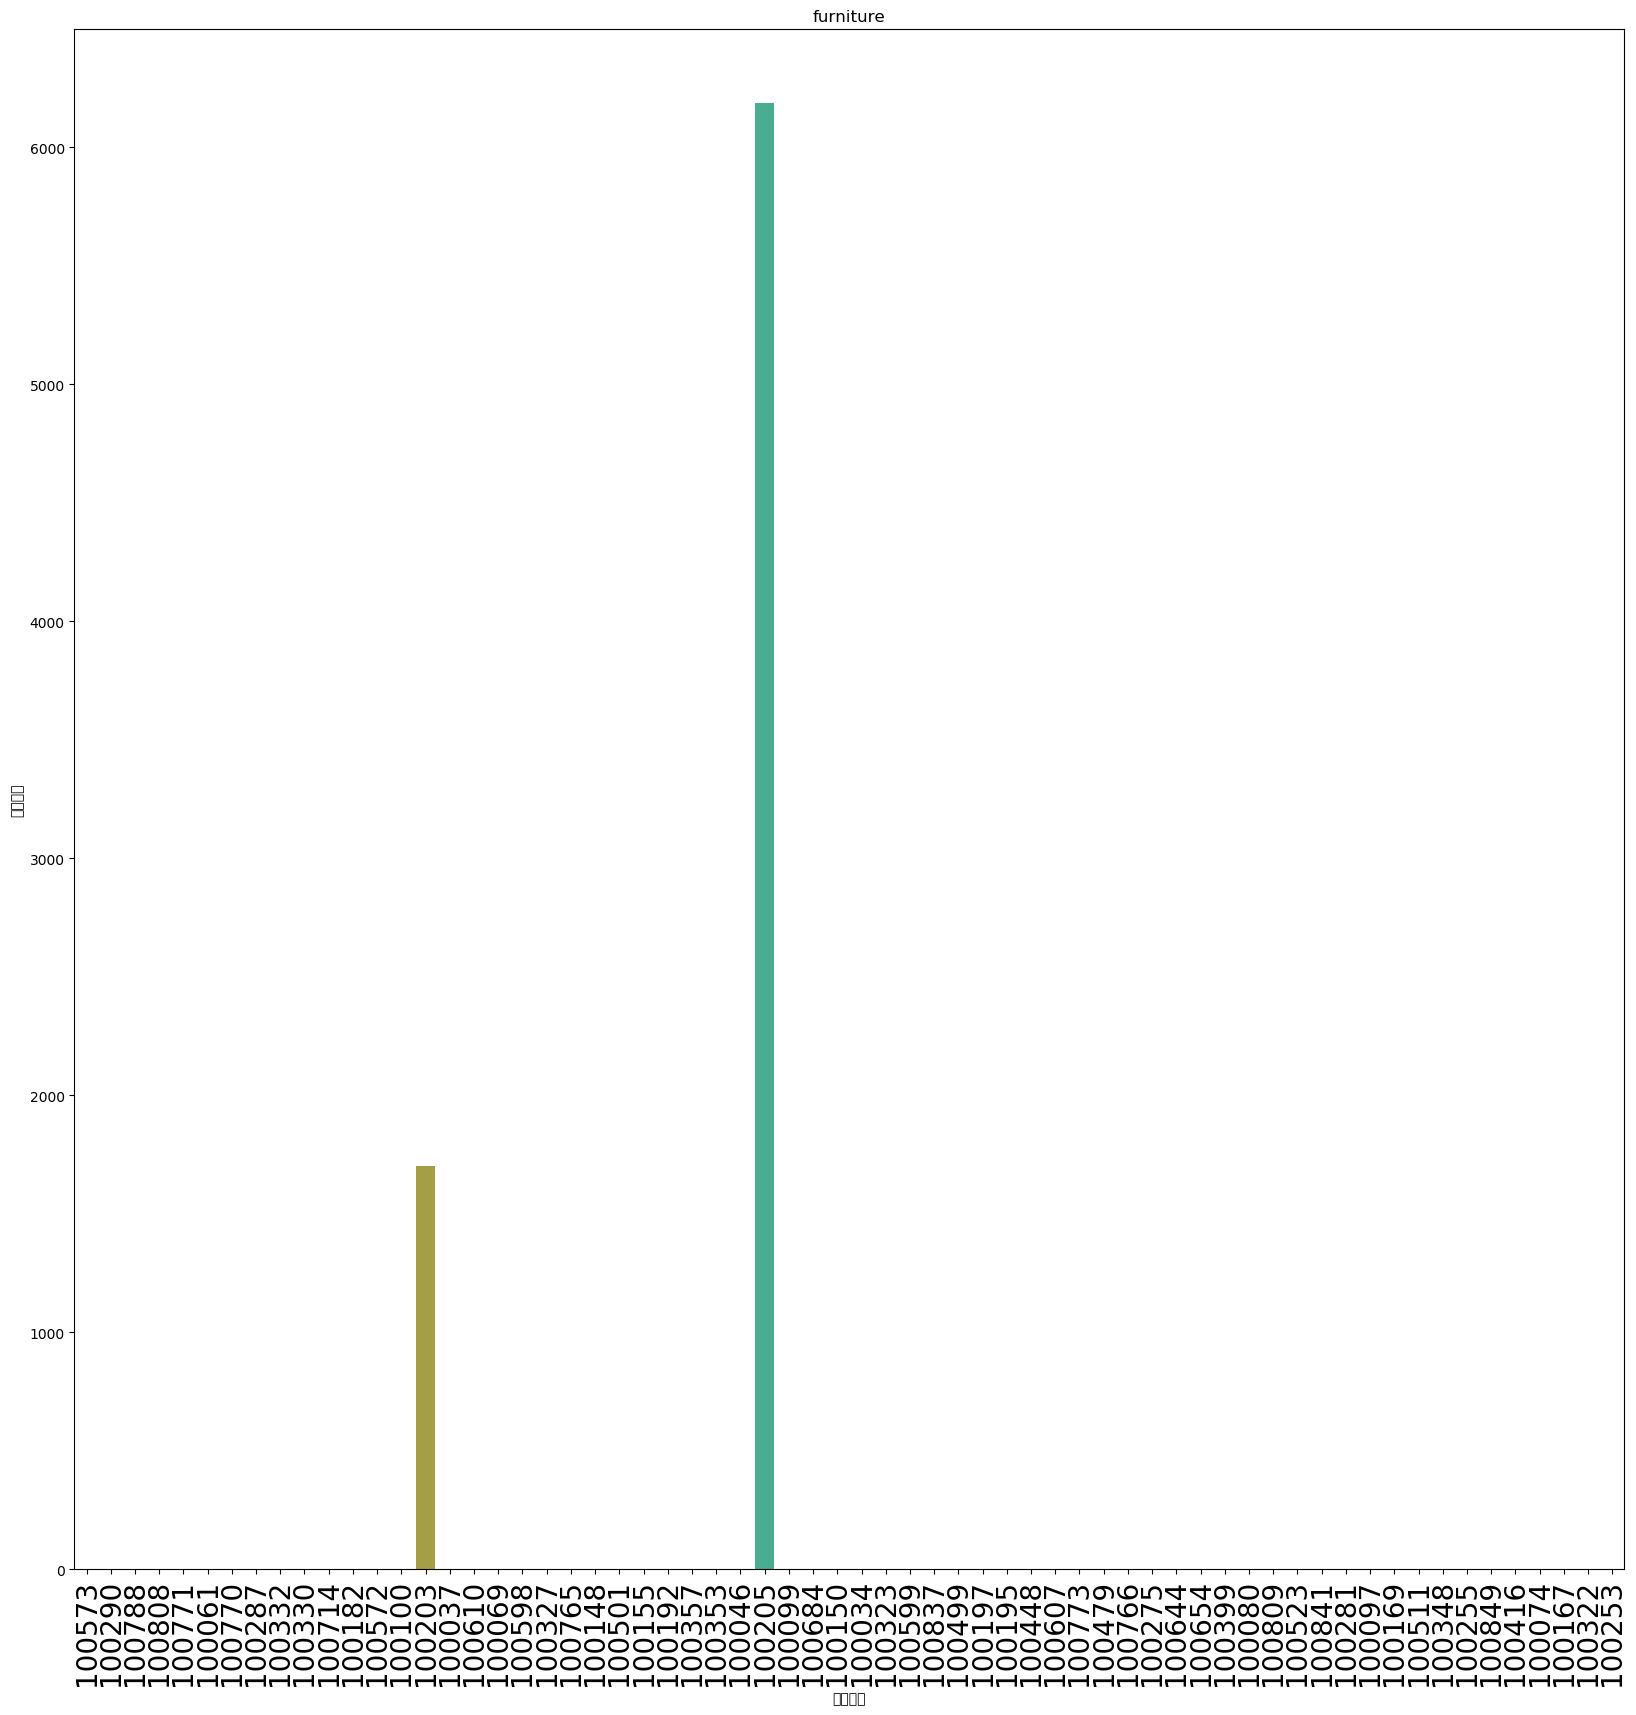

In [187]:
for i in x:
    plt.figure(figsize=(20,20))
    plt.title(i)
    plt.xticks(size=20, rotation=90)
    sns.barplot(data=interitem_code[interitem_code['상품군']==i], x='마더코드', y = '판매수량',
               order = interitem_code.sort_values('판매수량').마더코드)

1) 상품군 별 판매량 높은 마더코드 : contrast encoder[polynomial, helmert, sum, or backward different enocding]
- elec) 100150* / 100155*,100148*,100067, 100572*
- cloth) 100416*, 100455, 100452, 100809*, 100456 / 100042, 100479*, 100403, 100460, 100822, 100251 + 100353, 100357, 100714, 100808
- food) 100253*, 100010, 100322*, 100167*, 100849* / 100545, 100166, 100511*, 100169*, 100832, 100841* / 100199, 100202, 100523*, 100026, 100844, 100644* + 100499, 100323, 100046
- beauty) 100074* / 100399*, 100766*, 100773*, 100319 + 100327
- bedding) 100139 / 100447, 100200
- etc) 100731 / 100021, 100742, 100782 / 100158, 100197*, 100018, 100489 + 100034, 00069, 100037, 100788
- inner) 100348*, 100281*, 100618, 100305, 100612, 100080* / 100275*, 100777, 100607*, 100440 / 100224, 100444, 100195*, 100098 / 100599*, 100306, 100099*
+ 100192, 100598, 100610, 100287
- living) 100255*, 100475, 100097*, 100088 / 100448*, 100478, 100837*, 100102 / 100684*, 100683
+ 100765, 100100 100770, 100061, 100771
- health) 100055 / 100654*, 100309
- life) 100763, 100469 / 100789, 100501*, 100635 + 100182, 100330
- furniture) 100205* / 100500, 100203*

In [190]:
# 방송일시 datetime type으로
test['DATE'] = test['방송일시'].map(lambda x: 10000*x.to_pydatetime().year + 100*x.to_pydatetime().month + x.to_pydatetime().day)
# 방송일시 월
test['MONTH'] = test['DATE'].map(lambda x: int((x%10000)/100))
# 방송일시 시간대 
test['HOUR'] = test['방송일시'].map(lambda x: x.to_pydatetime().hour)
#data['DAY'] = data['DATE'].map(lambda x: (x%100))
# 방송일시 요일
w = ['mon','tue','wed','thu','fri','sat','sun']
test['DAY'] = test['방송일시'].map(lambda x: w[x.to_pydatetime().weekday()])

In [191]:
for i in range(len(test)):
    if test.loc[i, '상품군'] == '가구':
        test.loc[i, '상품군'] = 'furniture'
    elif test.loc[i, '상품군'] == '가전':
        test.loc[i, '상품군'] = 'elec'
    elif test.loc[i, '상품군'] == '건강기능':
        test.loc[i, '상품군'] = 'health'
    elif test.loc[i, '상품군'] == '농수축':
        test.loc[i, '상품군'] = 'food'
    elif test.loc[i, '상품군'] == '무형':
        test.loc[i, '상품군'] = 'no'
    elif test.loc[i, '상품군'] == '생활용품':
        test.loc[i, '상품군'] = 'life'    
    elif test.loc[i, '상품군'] == '속옷':
        test.loc[i, '상품군'] = 'inner'    
    elif test.loc[i, '상품군'] == '의류':
        test.loc[i, '상품군'] = 'cloth'    
    elif test.loc[i, '상품군'] == '이미용':
        test.loc[i, '상품군'] = 'beauty'    
    elif test.loc[i, '상품군'] == '잡화':
        test.loc[i, '상품군'] = 'etc'    
    elif test.loc[i, '상품군'] == '주방':
        test.loc[i, '상품군'] = 'living'    
    elif test.loc[i, '상품군'] == '침구':
        test.loc[i, '상품군'] = 'bedding'

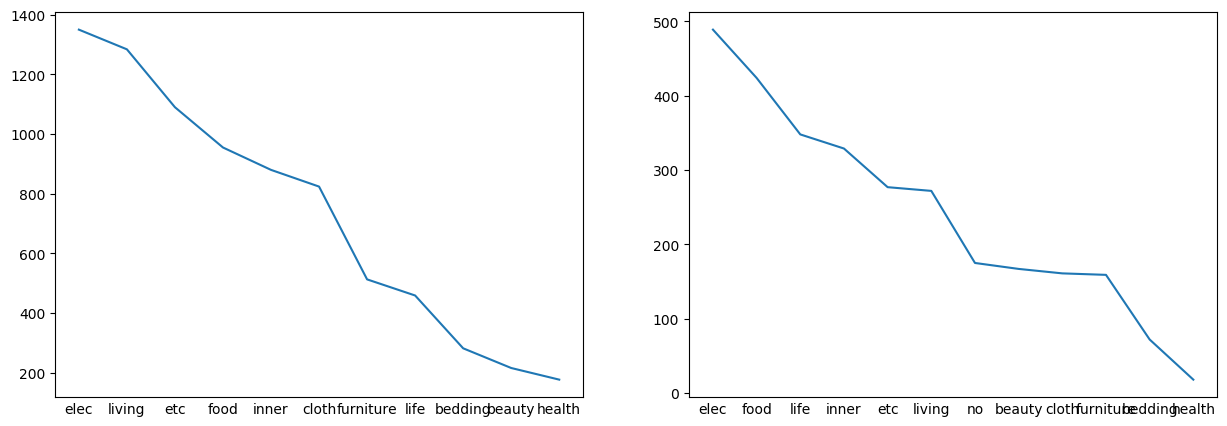

In [222]:
test_count = test['상품군'].value_counts()
train_count = train['상품군'].value_counts()

# 판매된 수량이랑 판매하려고 등장한 횟수랑 다름
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(train_count)
axs[0].tick_params('x', size=.001)
axs[1].plot(test_count)
axs[1].tick_params('x', size=.001)

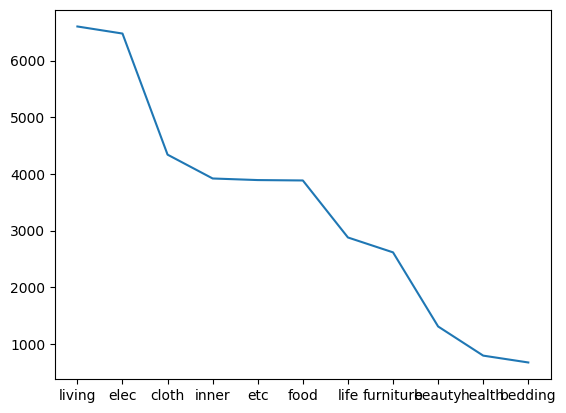

In [228]:
plt.plot(data['상품군'].value_counts())